# `Credit Card Fraud Detection`

## `Problem Statement:`

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFI has been uneven with both significant challenges and successes.

Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 

They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days.

For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 

The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers.


## `Goal`:-

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

In [1]:
## Importing primary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings as war
war.filterwarnings('always')
war.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Micro _credit_project_DataSheet.csv')
pd.set_option("display.max_columns",None)
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [3]:
## checking how huge our dataset is:
df.shape

(209593, 37)

Our dataset has 209593 rows and 37 columns including target.

In [4]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

## `About The Columns`:
##### Target:
- `label`:	Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
##### Features:
-`msisdn`:	mobile number of user
- `aon`:	age on cellular network in days
- `daily_decr30`:	Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
- `daily_decr90`:	Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
- `rental30`:	Average main account balance over last 30 days
-  `rental90`:	Average main account balance over last 90 days
- `last_rech_date_ma`:	Number of days till last recharge of main account
- `last_rech_date_da`:	Number of days till last recharge of data account
- `last_rech_amt_ma`:	Amount of last recharge of main account (in Indonesian Rupiah)
- `cnt_ma_rech30`:	Number of times main account got recharged in last 30 days
- `fr_ma_rech30`:	Frequency of main account recharged in last 30 days
- `sumamnt_ma_rech30`:	Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
- `medianamnt_ma_rech30`:	Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
- `medianmarechprebal30`:	Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
- `cnt_ma_rech90`	Number of times main account got recharged in last 90 days
- `fr_ma_rech90`:	Frequency of main account recharged in last 90 days
- `sumamnt_ma_rech90:`	Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
- `medianamnt_ma_rech90`:	Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
- `medianmarechprebal90`:	Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
- `cnt_da_rech30`:	Number of times data account got recharged in last 30 days
- `fr_da_rech30`:	Frequency of data account recharged in last 30 days
- `cnt_da_rech90`:	Number of times data account got recharged in last 90 days
- `fr_da_rech90`:	Frequency of data account recharged in last 90 days
- `cnt_loans30`:	Number of loans taken by user in last 30 days
- `amnt_loans30`:	Total amount of loans taken by user in last 30 days
- `maxamnt_loans30`:	maximum amount of loan taken by the user in last 30 days
- `medianamnt_loans30`:	Median of amounts of loan taken by the user in last 30 days
- `cnt_loans90`:	Number of loans taken by user in last 90 days
- `amnt_loans90`:	Total amount of loans taken by user in last 90 days
- `maxamnt_loans90`:	maximum amount of loan taken by the user in last 90 days
- `medianamnt_loans90:`	Median of amounts of loan taken by the user in last 90 days
- `payback30`:	Average payback time in days over last 30 days
- `payback90`:	Average payback time in days over last 90 days
- `pcircle`:	telecom circle
- `pdate`: 	date of purchasing

In [5]:
## Checking the types of  the features:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

### Observation:
- Seems there are no missing value present in my dataset.
- Our dataset is a mixture of different types of data, there are object data, float data, int data present.
- Last feature `Pdate` is object  data type because it is kind of date. We will extract date,month,year from this pdate feature for  better understanding.

### Statiscal Summary of  DataSet:

In [6]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


### Observation:
- `Unnamed:0`  feature is a kind  of  serial number , so it is not related with target variable, we will delete in further steps.
- Some features like `aon`, `daily_decr30`, `daily_decr90`,`rental30`,`last_rech-date_ma`,`last_rech_amt_ma`,`cnt_ma_rech30`, `fr_ma_rech30` and many more features have not appropriate distributed data, i.e. that the difference between min value and max value  is very high. It is not in acceptable range. we will handle it later.
- Some features have high standard deviation than it's mean value, which is not accpetable.
 

In [7]:
### checking the correlation:
df.corr()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
Unnamed: 0,1.000000,0.000403,-0.002048,0.002739,0.003077,-0.003906,-0.003459,-0.001853,-0.001133,-0.001064,0.003320,0.003181,0.000123,-0.001371,0.001258,0.002329,-0.000249,0.000523,-0.000298,-0.001947,0.000888,-0.002504,-0.001324,-0.002827,0.001725,0.002387,0.000698,-0.002005,0.002241,0.000781,0.001742,-0.002615,-0.000040,0.002411
label,0.000403,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,0.001330,0.202828,0.141490,-0.004829,0.236392,0.084385,0.205793,0.120855,0.039300,0.003827,-0.000027,0.002999,-0.005418,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.002048,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,-0.001163,0.000707,0.004306,0.003930,-0.002725,0.004401,0.001011,0.004909,-0.000859,0.001564,0.000892,0.001121,0.005395,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.002739,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,0.636536,0.295356,-0.001153,0.587338,-0.078299,0.762981,0.257847,0.037495,0.000700,-0.001499,0.038814,0.020673,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.003077,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,-0.000343,0.603886,0.282960,-0.000746,0.593069,-0.079530,0.768817,0.250518,0.036382,0.000661,-0.001570,0.031155,0.016437,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,-0.003906,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,-0.001219,0.272649,0.129853,-0.001415,0.312118,-0.033530,0.342306,0.110356,0.027170,-0.001105,-0.002558,0.072255,0.046761,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,-0.003459,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,-0.000503,0.259709,0.120242,-0.001237,0.345293,-0.036524,0.360601,0.103151,0.029547,-0.000548,-0.002345,0.056282,0.036886,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,-0.001853,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,-0.001629,0.002105,-0.001358,0.004071,0.004263,0.001414,0.002243,-0.000726,-0.001086,-0.003467,-0.003626,-0.003538,-0.002395,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,-0.001133,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,0.001158,0.000046,0.001037,0.002849,0.001272,0.000798,-0.000414,0.000219,0.004158,-0.003628,-0.000074,-0.001859,-0.000203,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,-0.001064,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,0.002876,0.440821,0.794646,-0.002342,0.016707,0.106267,0.418735,0.818734,0.124646,-0.001837,-0.003230,0.014779,0.016042,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260


- In this above correlation table we an say there are many features correlation  with  target is  negligible. But we can not drop those columns based on one  evidence, so we will do some analysis and try to proof  that is there really no relation  with target or not.?

### Checking  NaNs

In [8]:
df.isna().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

As we assume that there is  no Null values present in my dataset.

### Checking Duplicates &  Dropping  Duplicates  (if present)

In [9]:
df.duplicated().sum()

0

There is not any  duplicates present.

### Dropping Non-required features:

- `Unnamed: 0` feature is kind of  serial number and we also check the correlation with target of this feature and we conclude that we will drop this features as it is not related with target.
- `msisdn` feature  is a mobile number of the customers. Ovioulsly we know that how  can a mobile number is related with target, that the customer will pay the credit amount or not.

In [10]:
df=df.drop(columns=["Unnamed: 0","msisdn"])
print("New shape  of the dataset is  : ", df.shape)

New shape  of the dataset is  :  (209593, 35)


# `EDA`

#### Checking  Imbalancing dataset:



1    183431
0     26162
Name: label, dtype: int64




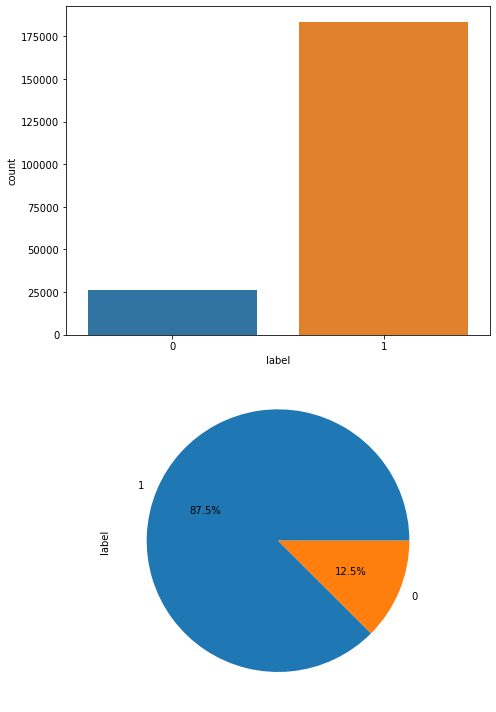

In [11]:
print('\n')
print(df.label.value_counts())
print('\n')
plt.figure(figsize=(7,10))
plt.subplot(2,1,1)
sns.countplot(df.label)
plt.tight_layout

plt.subplot(2,1,2)
df.label.value_counts().plot.pie(autopct='%1.1f%%')
plt.tight_layout()

- We can see the imbalanced dataset here.
- As we  can from above graph 87.5% customers are  payed it's credit card payment but 12.5% customers are not payed.
- So that we can say that we have biased class, which is the distinctive example of Imbalanced Classification Problem. We will use Over-Sampling or Under-Sampling technique to handle this type of problem. We  will take care of it before model building.

In [12]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [13]:
df['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

`pcircle` feature has only one unique value. So we also drop it.

In [14]:
df=df.drop('pcircle',axis=1)

### `Pdate`
`pdate` feature hold the Date type data. So  we will extract day  month and  year  from it.

In [15]:
df["date"] = pd.to_datetime(df.pdate,format = "%Y-%m-%d").dt.day
df["month"] = pd.to_datetime(df.pdate,format = "%Y-%m-%d").dt.month
df["year"] = pd.to_datetime(df.pdate,format = "%Y-%m-%d").dt.year

In [16]:
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,date,month,year
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20,20,7,2016
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10,10,8,2016
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19,19,8,2016
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06,6,6,2016
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22,22,6,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,2016-06-17,17,6,2016
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,2016-06-12,12,6,2016
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,2016-07-29,29,7,2016
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,2016-07-25,25,7,2016


In [17]:
### checking year's values
df.year.value_counts()

2016    209593
Name: year, dtype: int64

As we can see that there is only  one unique value present in year feature.So  We will drop it  as well.

In [18]:
df=df.drop(columns=['pdate','year'])

In [19]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,date,month
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6


In [20]:
## checking data type of all features again
df.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

we noticed that we have remove all  object data type features from our dataset.

## ` Checking the Relation with Target`

In [21]:
def RelationWithTarget(feature):
    
    plt.figure(figsize=(12,10))
    plt.subplot(2,1,1)
    ax=sns.kdeplot(df[feature][df['label']==1],color='red',shade=True)
    sns.kdeplot(df[feature][df['label']==0],ax=ax,color='blue',shade=True)
    ax.legend(['Paid','NotPaid'],loc='upper right')
    plt.tight_layout()
    
    plt.subplot(2,1,2)
    sns.stripplot(x = df['label'],y =df[feature])
    plt.tight_layout()

#### `age on cellular network in days (aon)`

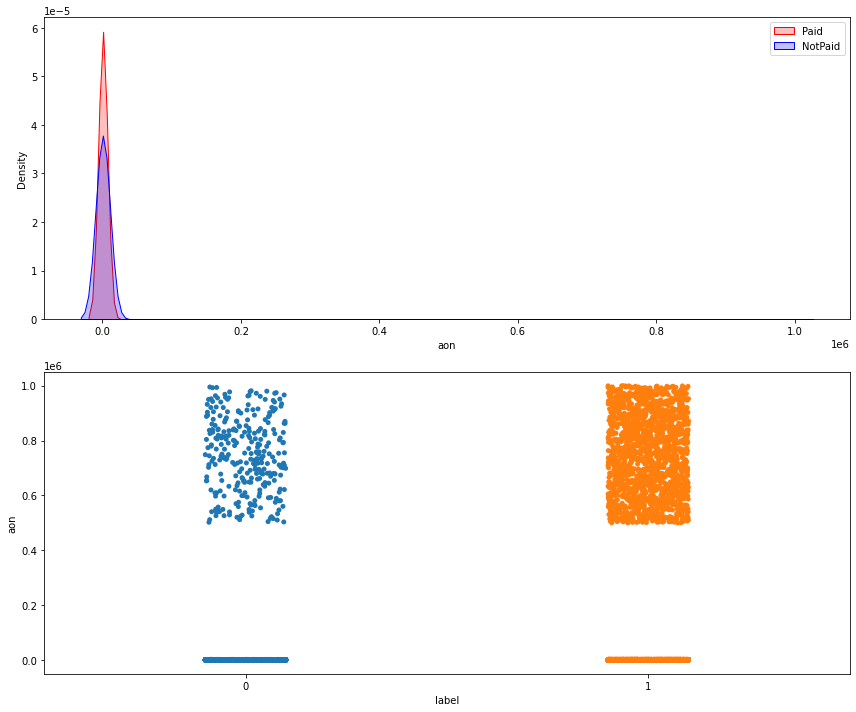

In [22]:
RelationWithTarget('aon')

#### Observation:
- As we can see in the first figure that most of the data points fall betweeen 0 to 0.05 le^6.
- As less number of  age on cellular network(in days), as higher chance of user paid back the credit amount.
- we can not  differentiate with paid or non paid graph so we can say that there is negligible relation or no relation between feature and target.

### `daily_decr30 :- Daily amount spent from main account, (averaged over last 30 days)`

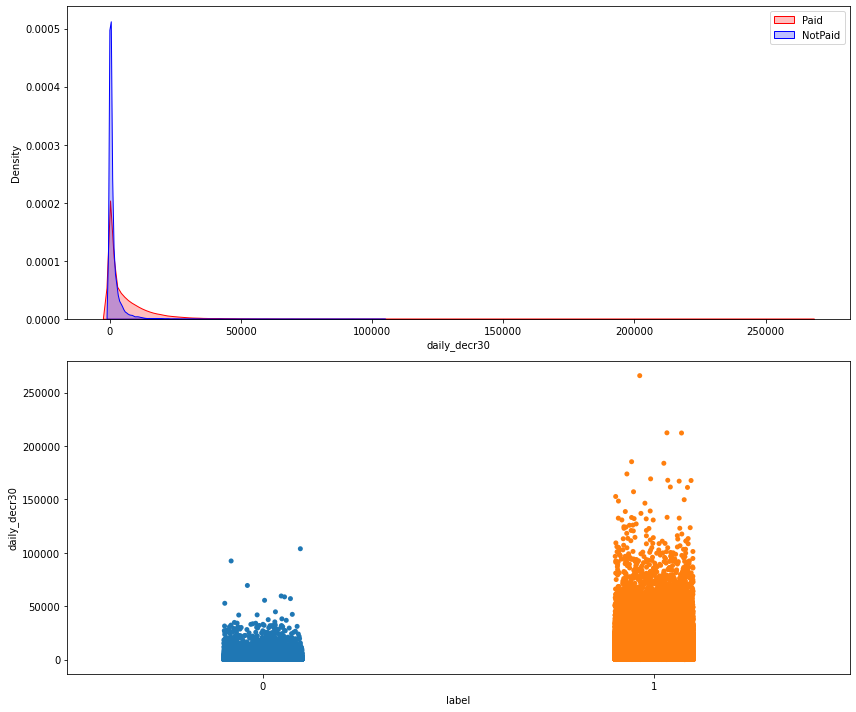

In [23]:
RelationWithTarget('daily_decr30')

#### observation:-
- Daily amount spent from main account when its 0, there is high chance the user did not paid, but as daily amount spet from main account increases the user paid back the  credit amount.

### `daily_decr90:- Daily amount spent from main account (averaged over last 90 days)`

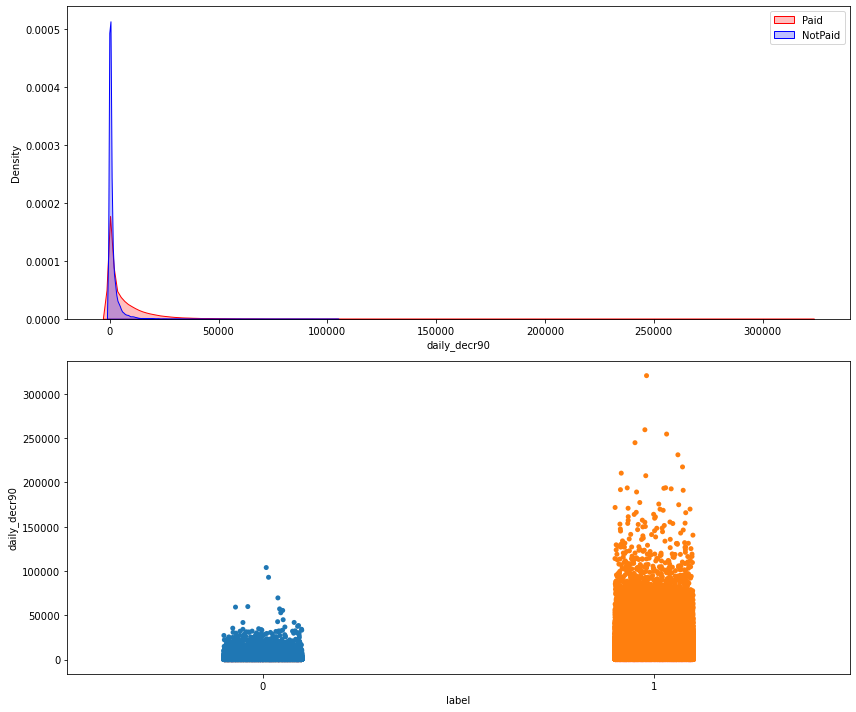

In [24]:
RelationWithTarget('daily_decr90')

#### observation:-
As we have seen previously that as Daily amount of user's main account is increases than it's high probality that user paid back it's credit amount.

### `rental30:-Average main account balance (last 30 days)`

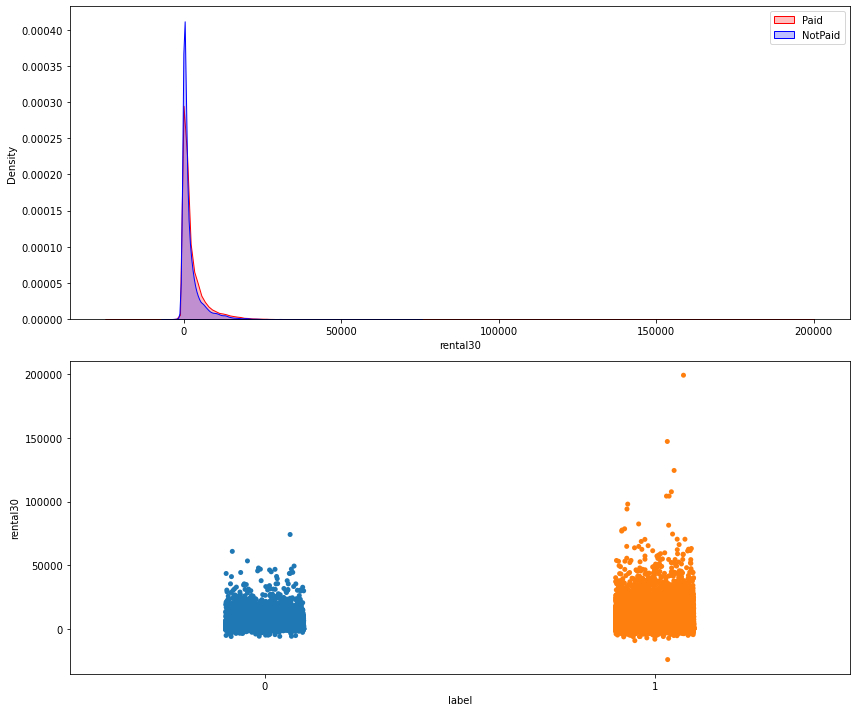

In [25]:
RelationWithTarget('rental30')

#### observation:
- Most of the users did not  maintain it's account. Their account balace is zero that's why they fraud with the  company.
- As we seen that as Avg main balance is increasing the chance is also increasing that user paid back to us.

### `rental90: Average main account balance (last 90 days)`

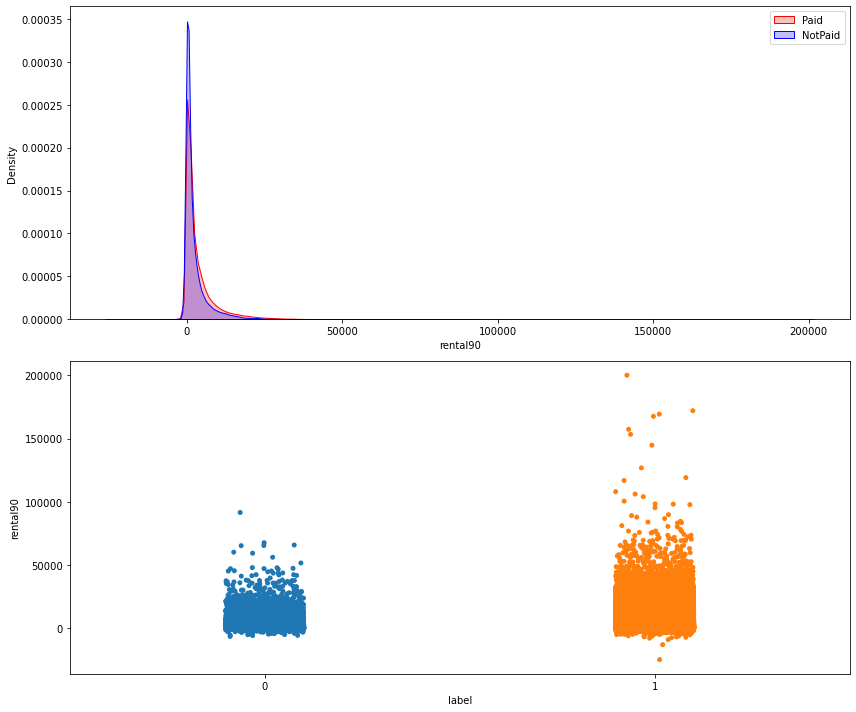

In [26]:
RelationWithTarget('rental90')

Same applies here also.

### `last_rech_date_ma:- Number of days till last recharge of main account`

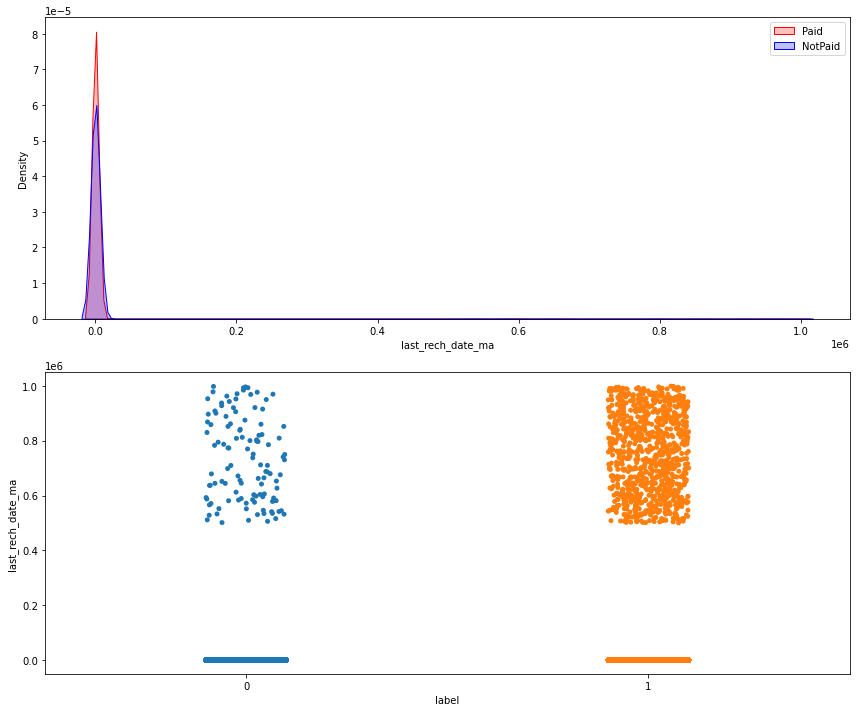

In [27]:
RelationWithTarget('last_rech_date_ma')

#### observation:
- most of the data point fall inaround 0 but.
- Here we can not differentiate between paid back user and non paid user. So we can say there is no relation between feature and label.

### `last_rech_date_da:- Number of days till last recharge of data account`

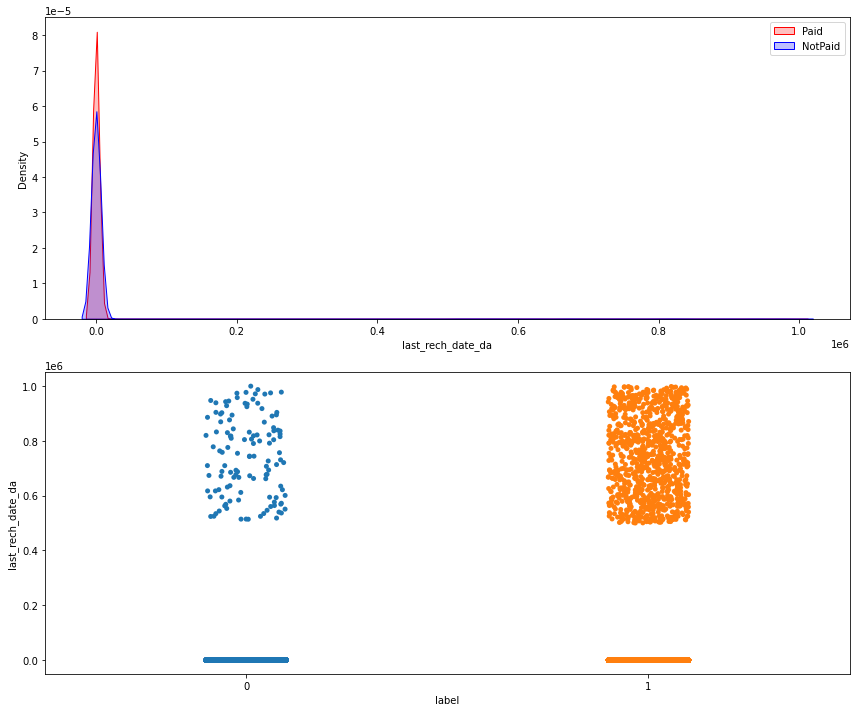

In [28]:
RelationWithTarget('last_rech_date_da')

#### observation:
- We can not compare  this  feature with paid label and non paid label. So we can say that there is no relation between last_rech-date_da with label.

### `last_rech_amt_ma:- Amount of last recharge of main account`

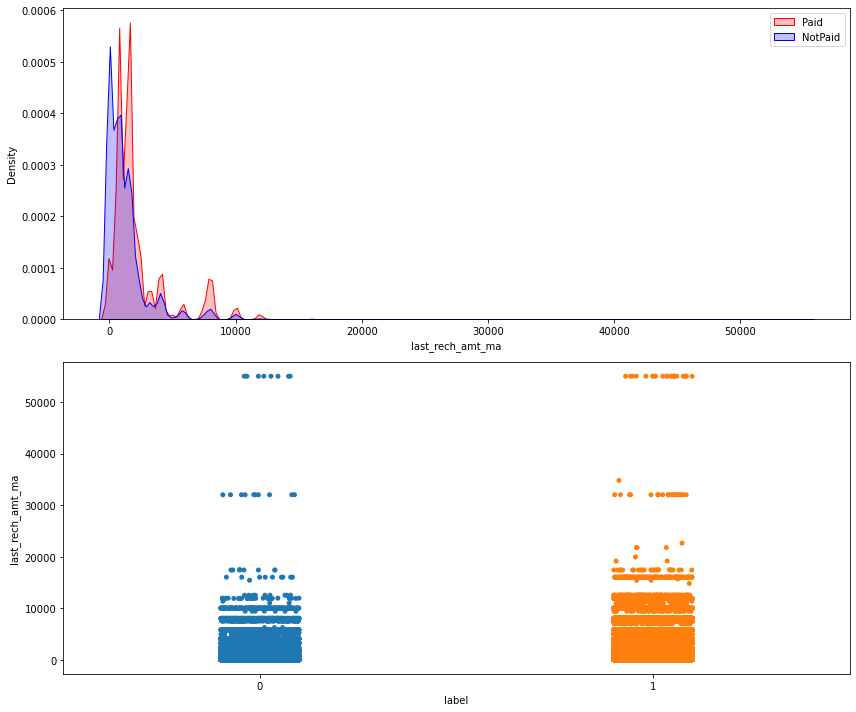

In [29]:
RelationWithTarget('last_rech_amt_ma')

### Observation:
- We can easily see that When last recharge is zero,then the fraud chance is very high, but as the amount of recharge is increasing the fraud chance decreasing drasticaly. It mean we can say that as recharge amount increasing the possibility also increasing that user paid back its credit amount.

## `cnt_ma_rech30 :- Number of times main account got recharged (last 30 days)`


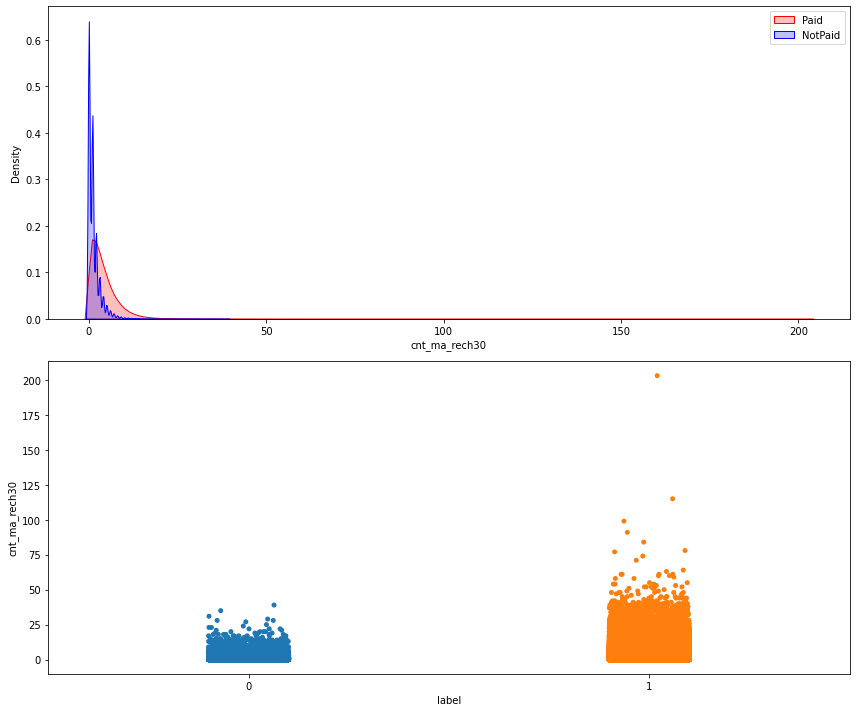

In [30]:
RelationWithTarget('cnt_ma_rech30')

#### Observation:
- As we can see that in the above graphs, When number of recharge in main account is zero than the fraud chance is very high, but as number of recharge in main account increases the fraud chance is drastically decreasing.
- If number of recharge is greater then 50, that time user 100% pay back its credit amount.

## `fr_ma_rech90:- Frequency of main account recharged (last 90 days)`

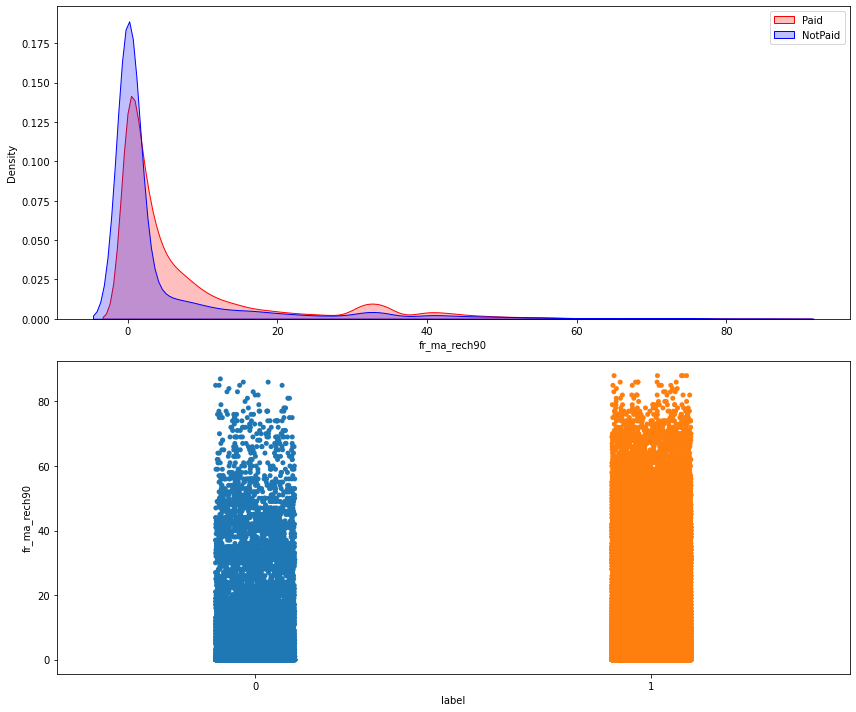

In [31]:
RelationWithTarget('fr_ma_rech90')

### observation:-
- When frequency, when main account got recharged, is zero or around zero that time fraud chance is very high,.
- As frequency, when main account got recharge, is increasing that time 50-50% chance that user pay back it's credit amount or not.
- When frequency is between 30 to 40, we can see the little bump in the graph 1, it mean this time the probability is high that the user will pay back.

## `sumamnt_ma_rech90:- Total amount of recharge in main account (last 90days)`

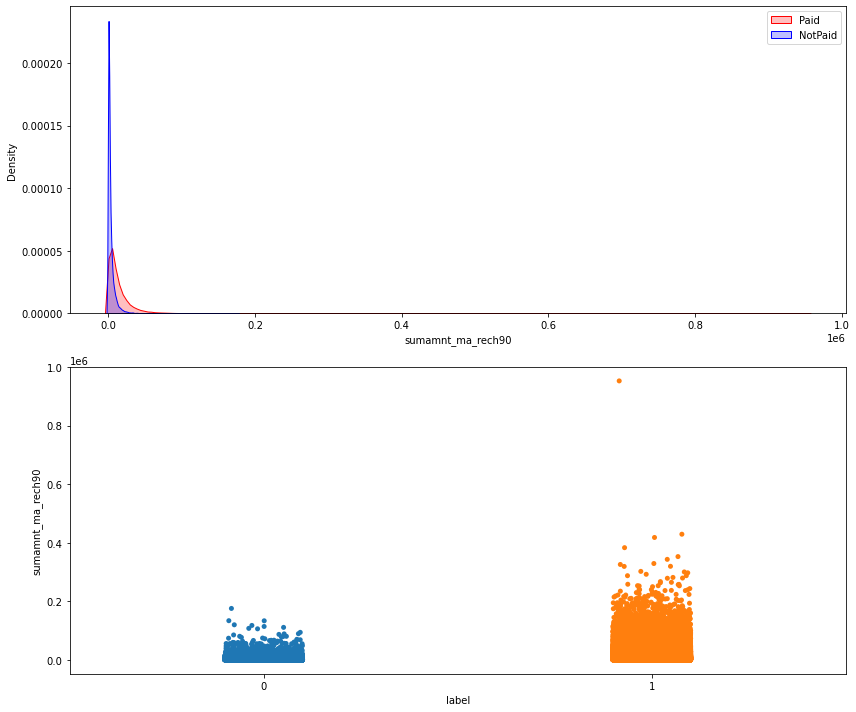

In [32]:
RelationWithTarget('sumamnt_ma_rech90')

### observation:
- When sum of total amount of recharge is around zero, fraud probality is  high ,but as recharge amount is  increases the fraud chance go down and down.

## `medianamnt_ma_rech90:- Median of amount of recharges done in main account`

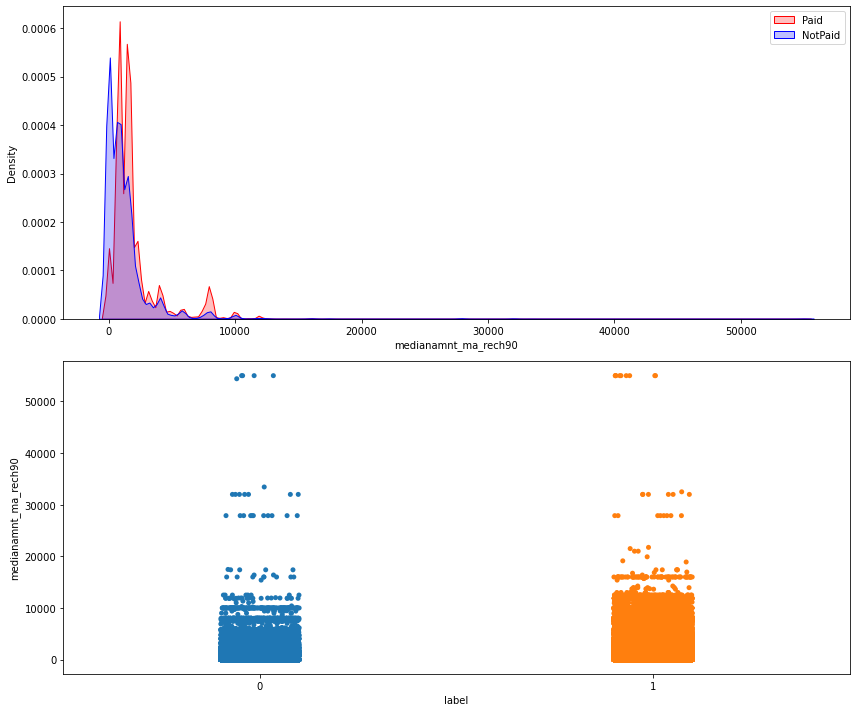

In [33]:
RelationWithTarget('medianamnt_ma_rech90')

## `medianmarechprebal90:- Median of main account balance just before recharge`

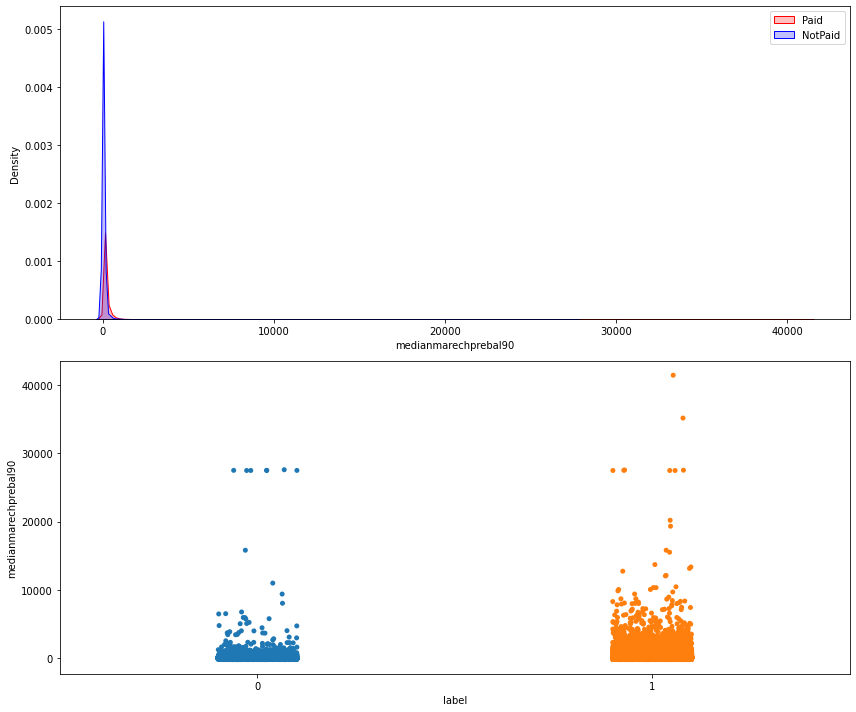

In [34]:
RelationWithTarget('medianmarechprebal90')

- The relationship of this feature with target is very low or we can say no relation.

## `cnt_da_rech30:- Number of times data account got recharged (last 30 days)`

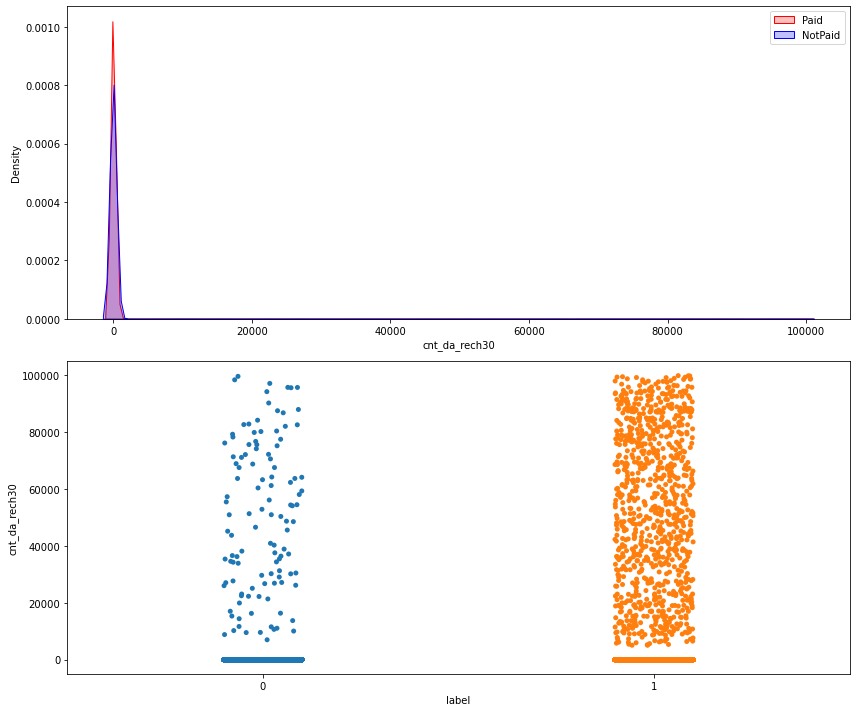

In [35]:
RelationWithTarget('cnt_da_rech30')

### observation:-
- Here we see that we can not  differentiate between fraud or not  fraud. It mean that there is no relation with  target and this  feature.

## `fr_da_rech30:- Frequency of data account recharged (last 30 days)`


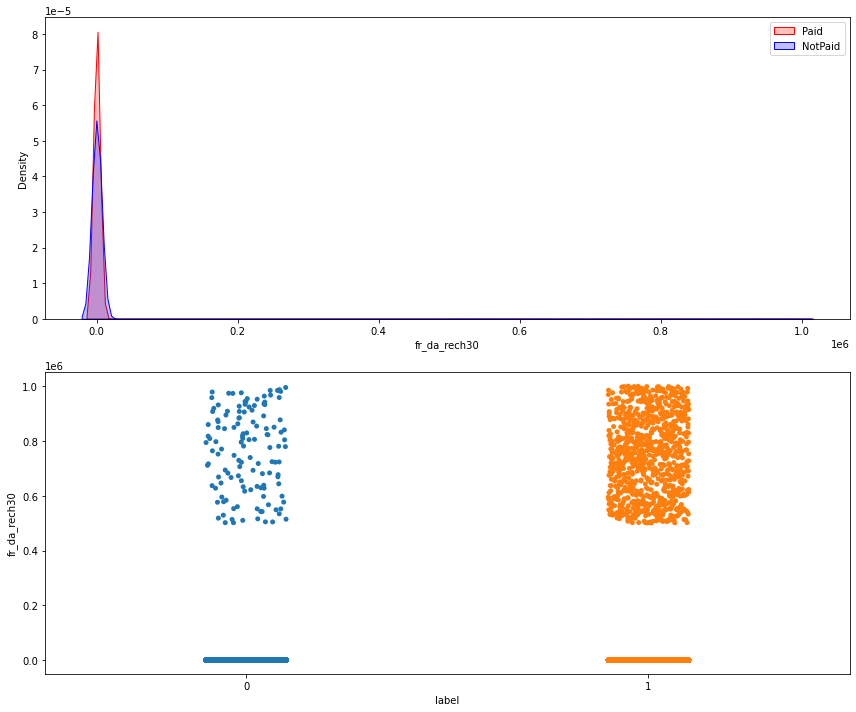

In [36]:
RelationWithTarget('fr_da_rech30')

There is no relation between target and feature.

## `cnt_da_rech90:- Number of times data account got recharged (last 90 days)`

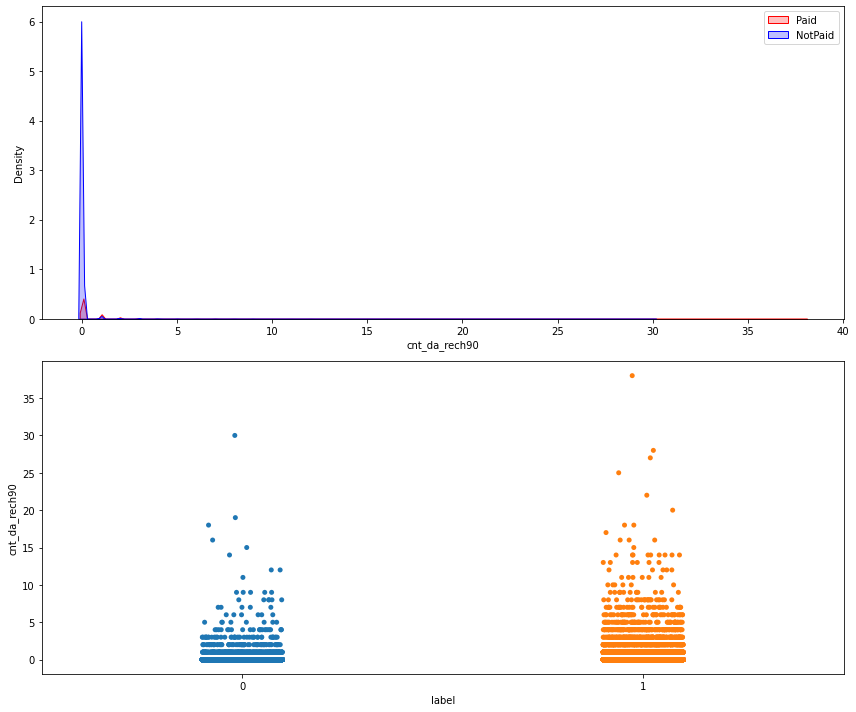

In [37]:
RelationWithTarget('cnt_da_rech90')

### Observation:-
- At the begging we observe that there is 50-50% chance that user pay back or not based on number of times data account got recharged.
- when data account got recharged 30 times or more then 30 times, than there is 100% chance that user pay back it's credit amount.

## `fr_da_rech90:- Frequency of data account recharged (last 90 days)`

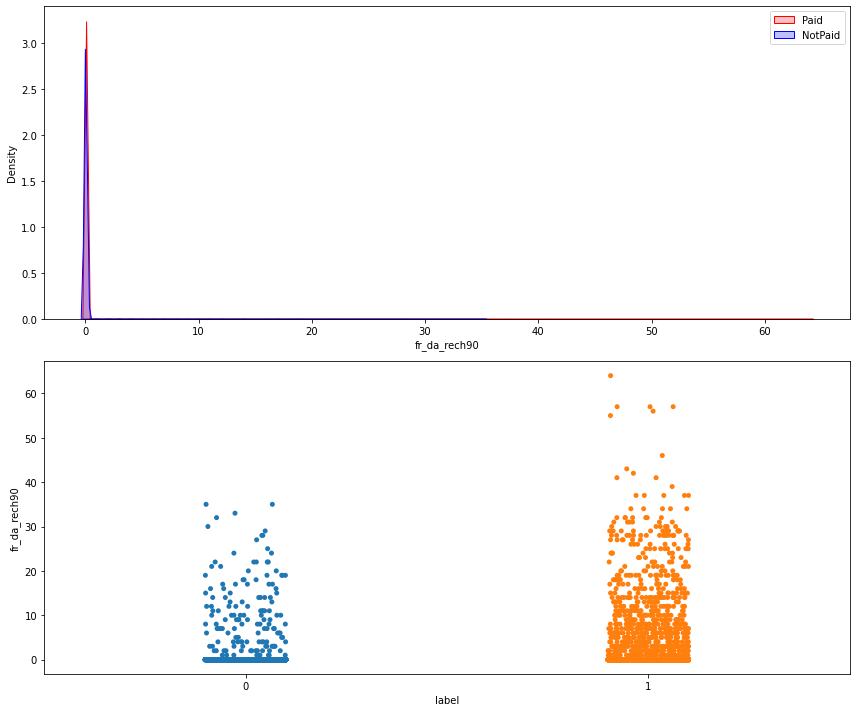

In [38]:
RelationWithTarget('fr_da_rech90')

#### observation:
- if the frequency of number, when data account got recharged, has gone above 35 then there is no chance that user found cheated.

## `cnt_loans30:- Number of loans taken by user (last 30 days)`

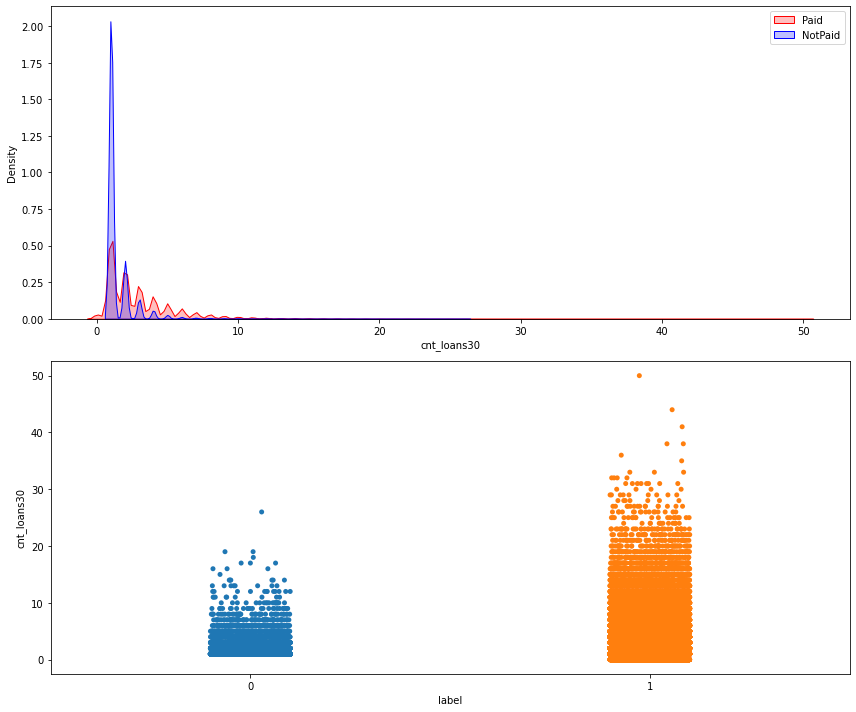

In [39]:
RelationWithTarget('cnt_loans30')

### Observation:
- It interesting that when user did not take any loan, that time they cheat with company.
- If user take loan more than 5 times there is  less chance that  user will cheat with company.

## `amnt_loans30:- Total amount of loans taken by user (last 30 days)`

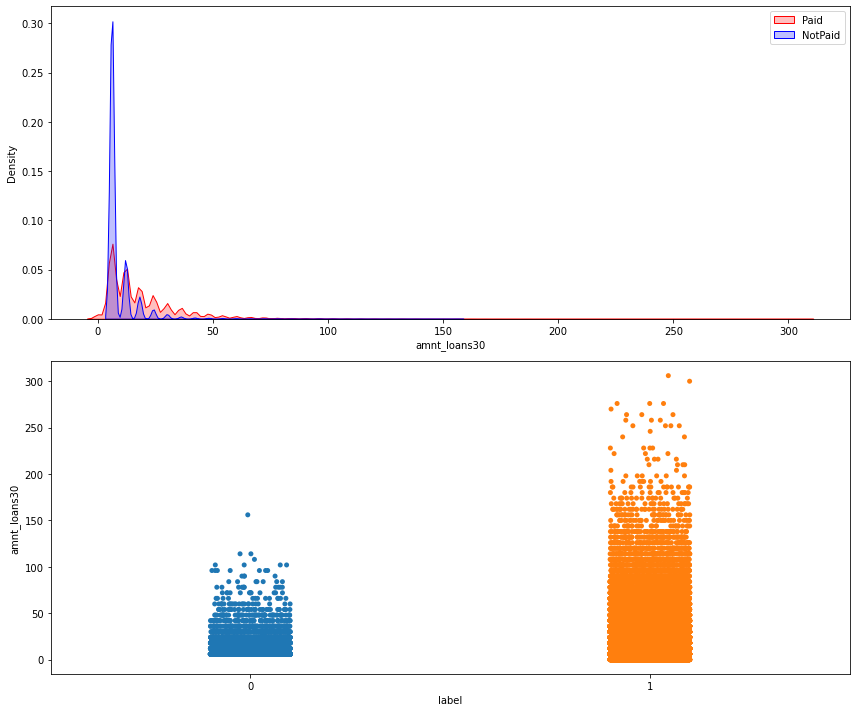

In [40]:
RelationWithTarget('amnt_loans30')

### Observation:
- as loan amount increasing the chance of cheating is decreasing.
- if Loan amount is gone upto 150 than there is no chance that user cheated with company.

## `maxamnt_loans30:- maximum amount of loan taken by the user (last 30 days)`

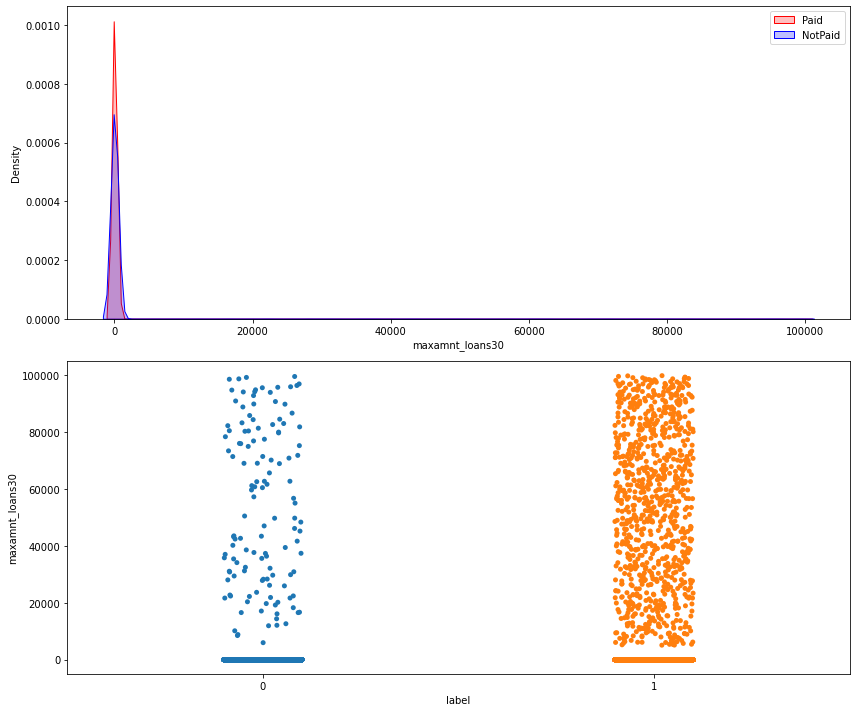

In [41]:
RelationWithTarget('maxamnt_loans30')

- We observe from the above graph that we can not find that user will cheat us or not based on maximum loan amount which taken by user.
- It mean there is no relation of this feature with target.

## `medianamnt_loans30:- Median of amounts of loan taken by the user (last 30 days)`

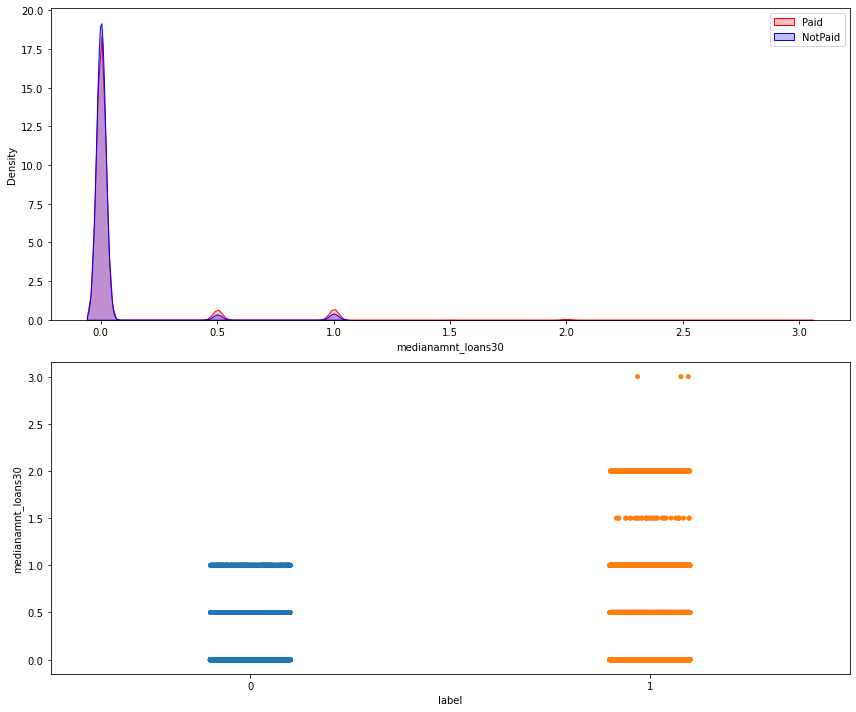

In [42]:
RelationWithTarget('medianamnt_loans30')

### observations:-
- If Median of amounts of loan taken by the user is above 1 than there is 100% chance that user will pay back to the  company.

## `cnt_loans90:- Number of loans taken by user (last 90 days)`

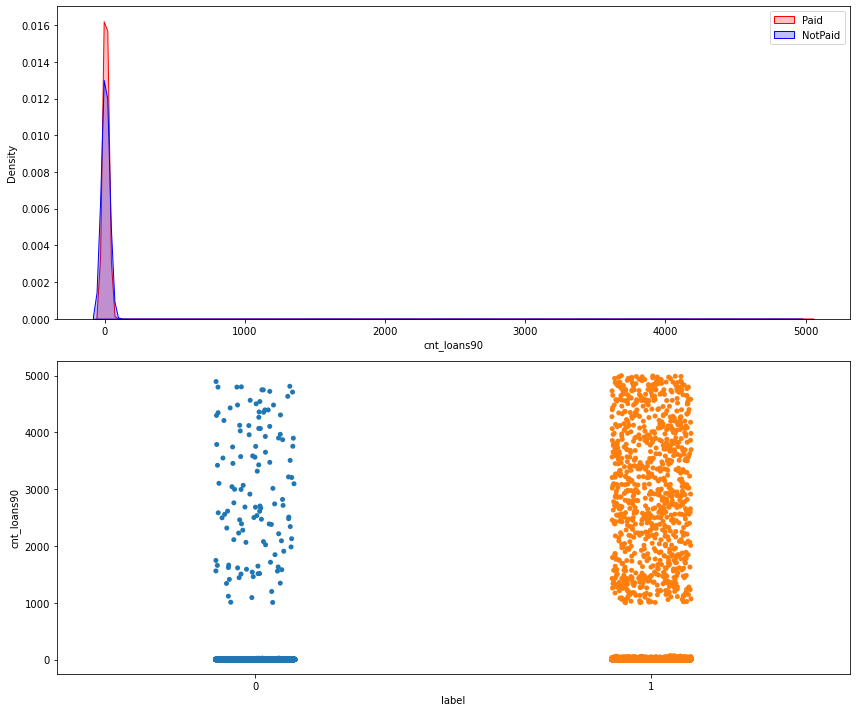

In [43]:
RelationWithTarget('cnt_loans90')

There is no relation with Number of loans taken by user with target.

## `amnt_loans90:- Total amount of loans taken by user (last 90 days)`

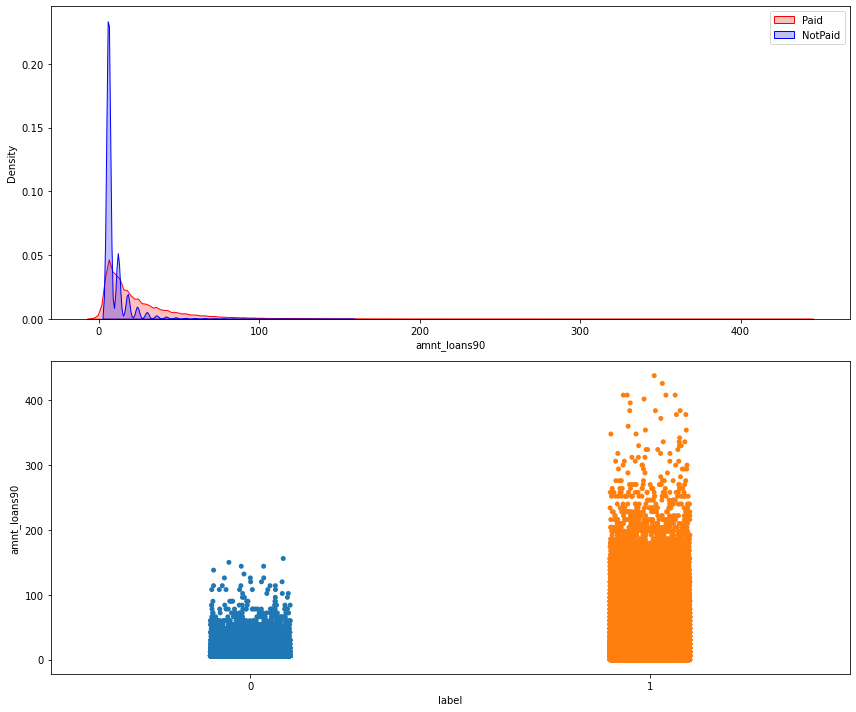

In [44]:
RelationWithTarget('amnt_loans90')

### Observation:-
- We can see clear up-trend here. As loan amount increasing than chances of scam is  getting down.
- And if the  loan amount is  above  200 then scam chances is become 0%.

## `maxamnt_loans90: maximum amount of loan taken by the user (last 90 days)`

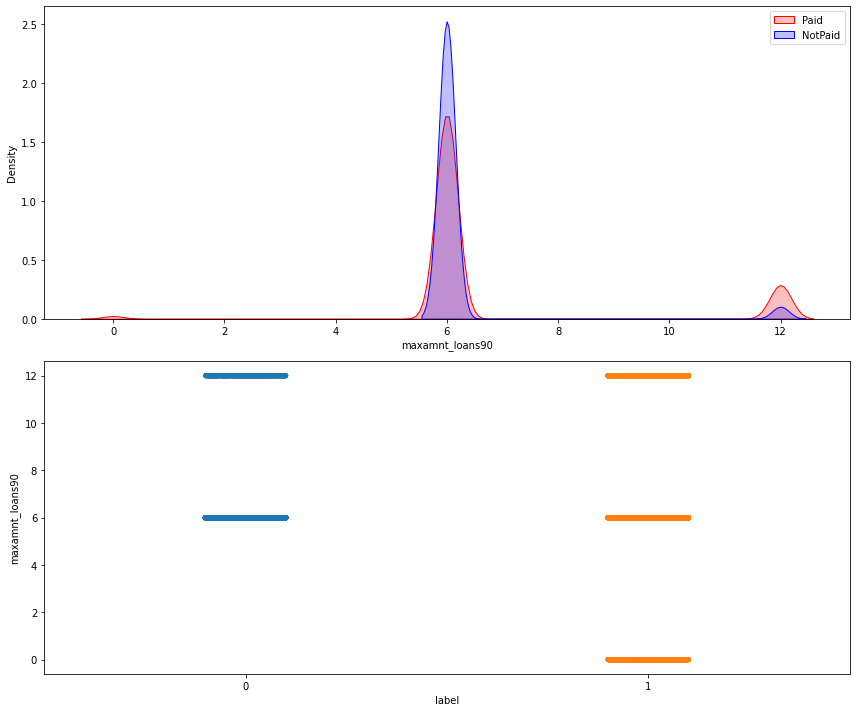

In [45]:
RelationWithTarget('maxamnt_loans90')

- If loan amount of user is low or below  5 unit, then user pay back to the  company 100%.
- but as loan amount increasing  above 5 unit, then fraud chance also increases.

## `medianamnt_loans90:- Median of amounts of loan taken by the user (last 90 days)`

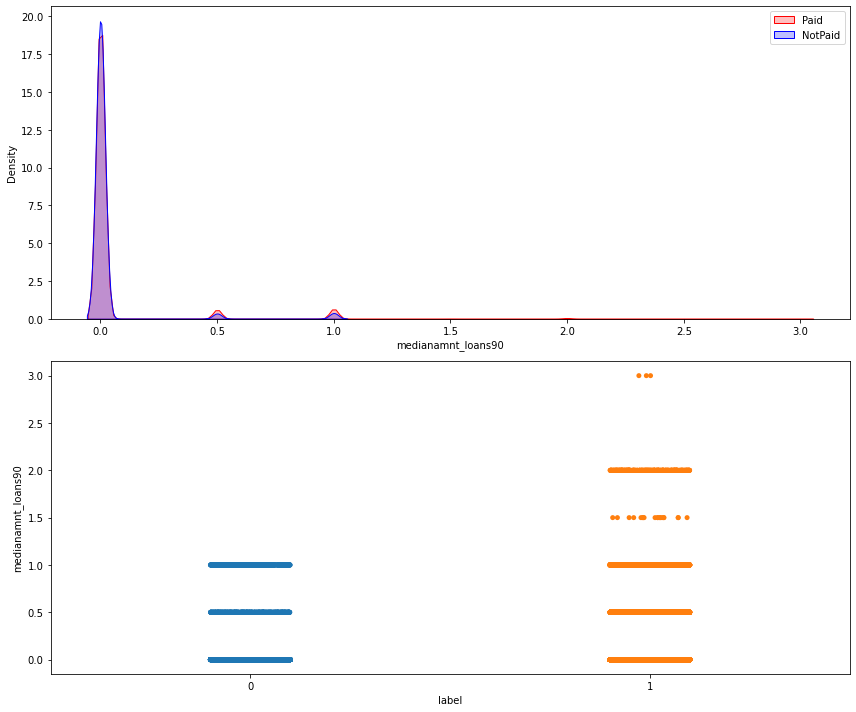

In [46]:
RelationWithTarget('medianamnt_loans90')

## `payback30:- Average payback time in days over (last 30 days)`

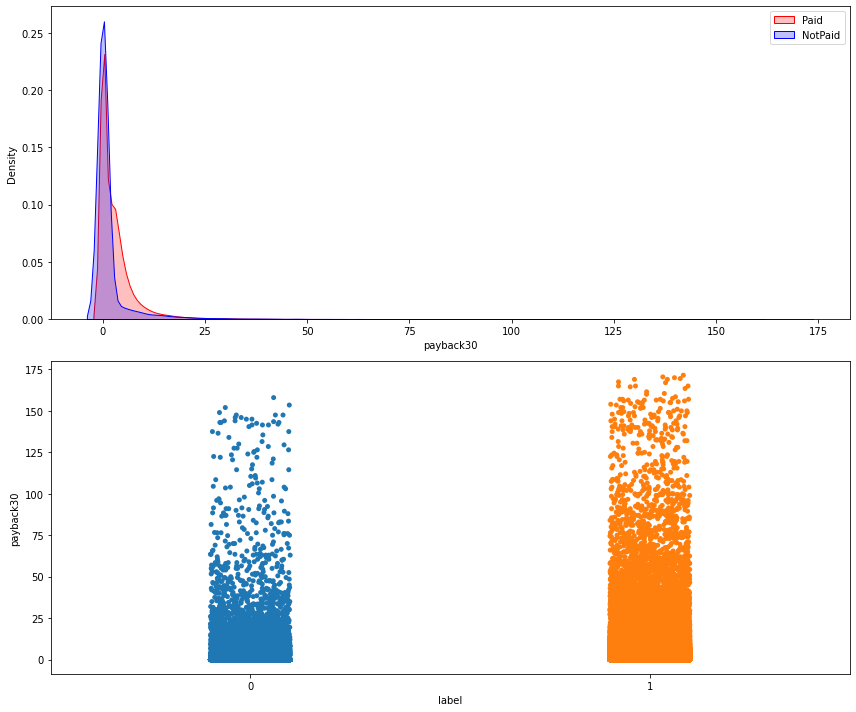

In [47]:
RelationWithTarget('payback30')

- There is very less relation between payback30 feature  with target.
- both  graph showing parallel relation with target.

## ` payback90:- Average payback time in days (last 90 days)`

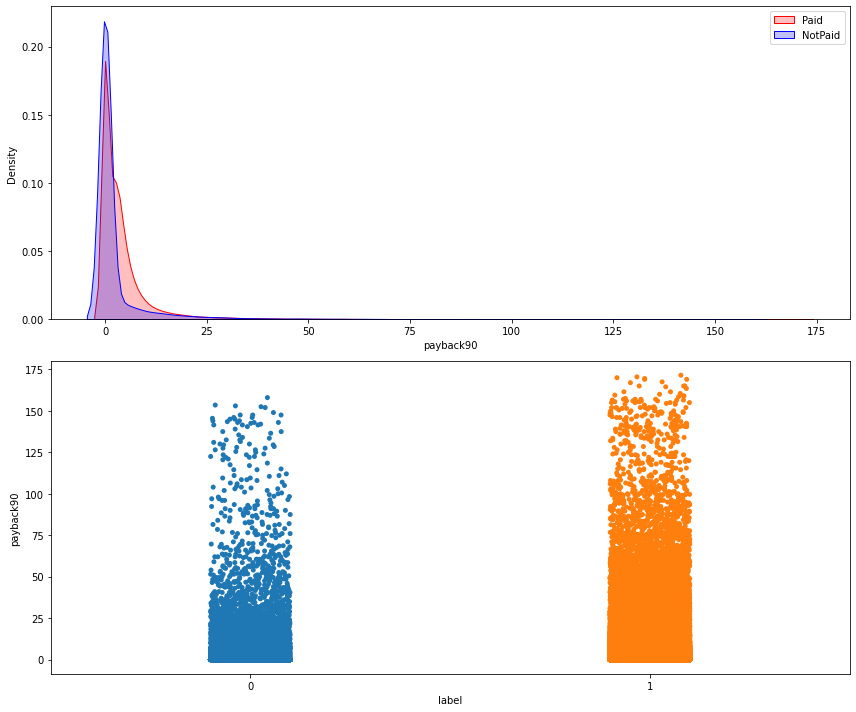

In [48]:
RelationWithTarget('payback90')

## `DATE`

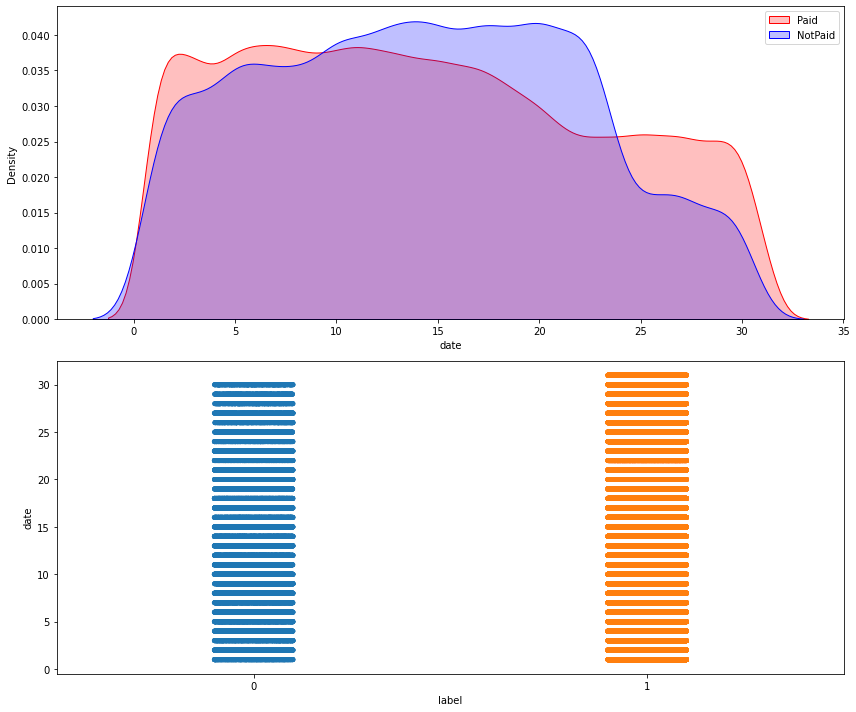

In [49]:
RelationWithTarget('date')

There is no realtion between date or label.

## `Month`

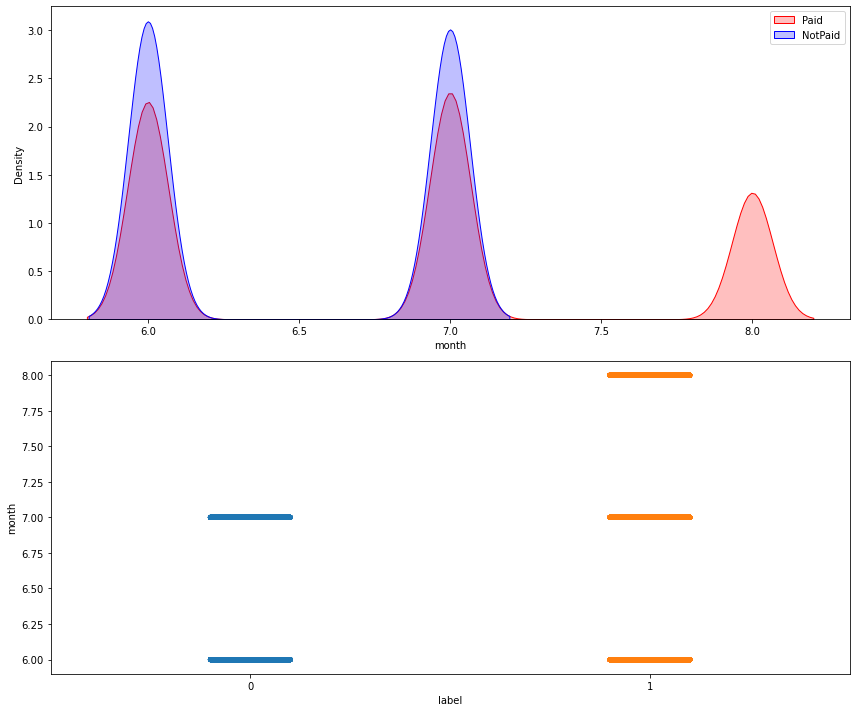

In [50]:
RelationWithTarget('month')

### Obsrvation:-
- In month 8(august) 100% user back pay to the company.

## Conclusion:
based on above analysis(Relationship With Target) we find that some features did not add any value for predicting the label. So we will drop those all features. Those features are listed below:-
- aon
- last_rech_date_ma
- last_rech_date_da
- fr_ma_rech90
- cnt_da_rech30
- fr_da_rech30
- maxamnt_loans30
- cnt_loans90
- payback30
- date
- payback90

In [50]:
df=df.drop(columns=['aon','last_rech_date_ma','last_rech_date_da','fr_ma_rech90',
                   'cnt_da_rech30','fr_da_rech30','maxamnt_loans30','cnt_loans90','payback30','date','payback90'])

In [51]:
print(df.shape)
df.head()

(209593, 24)


,label,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,month
0,0,3055.050000,3065.150000,220.13,260.13,1539,2,21.0,3078.0,1539.0,7.50,2,3078,1539.0,7.50,0,0,2,12,0.0,12,6,0.0,7
1,1,12122.000000,12124.750000,3691.26,3691.26,5787,1,0.0,5787.0,5787.0,61.04,1,5787,5787.0,61.04,0,0,1,12,0.0,12,12,0.0,8
2,1,1398.000000,1398.000000,900.13,900.13,1539,1,0.0,1539.0,1539.0,66.32,1,1539,1539.0,66.32,0,0,1,6,0.0,6,6,0.0,8
3,1,21.228000,21.228000,159.42,159.42,947,0,0.0,0.0,0.0,0.00,1,947,947.0,2.50,0,0,2,12,0.0,12,6,0.0,6
4,1,150.619333,150.619333,1098.90,1098.90,2309,7,2.0,20029.0,2309.0,29.00,8,23496,2888.0,35.00,0,0,7,42,0.0,42,6,0.0,6


Now  we have only 25 columns left including target variable.

## Checking The distribution

In [52]:
## creating a copy of data frame:
df1=df.copy()

In [53]:
### dropping  the label from copy dataframe:
df1.drop('label',axis=1,inplace=True)

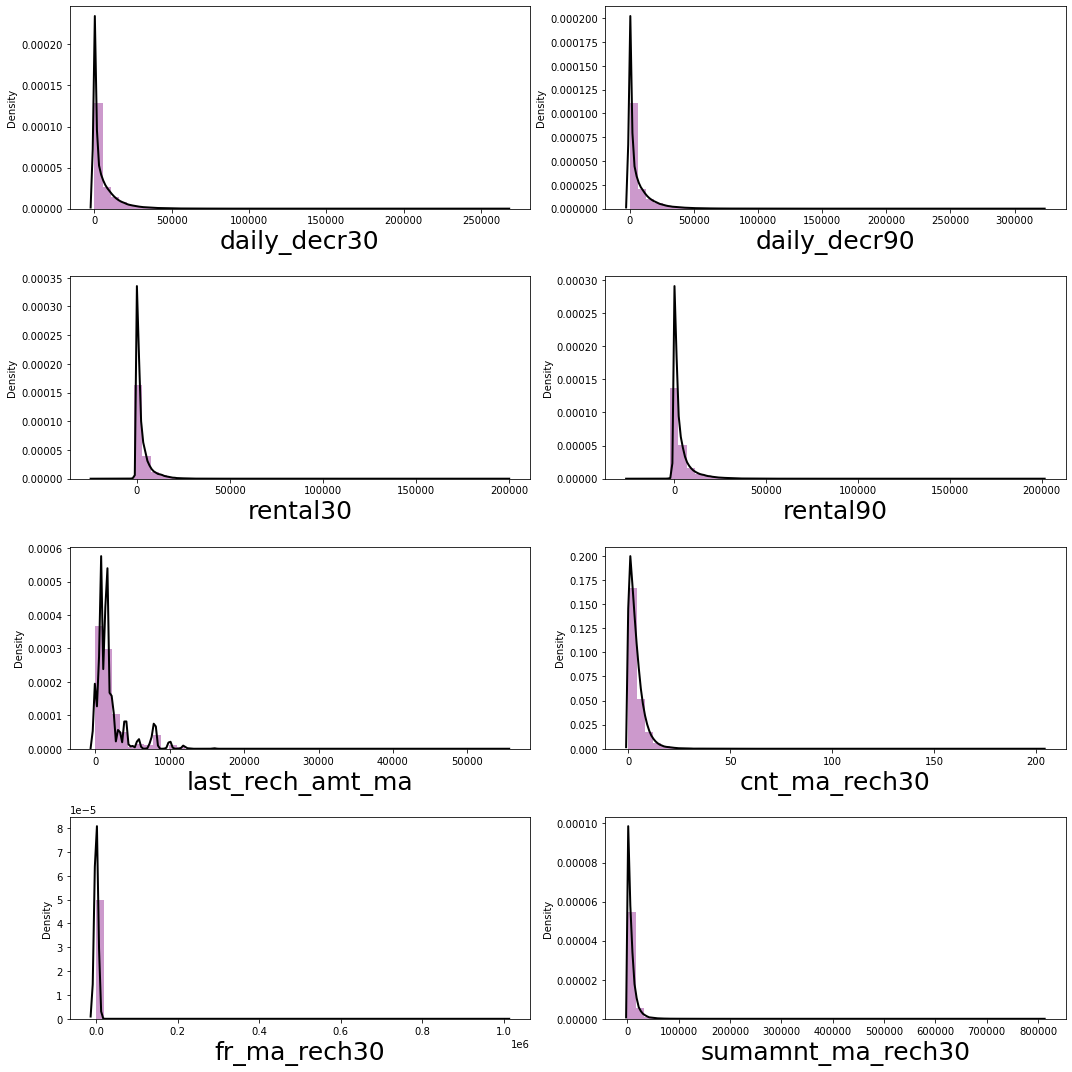

In [54]:
## plotting graph from column number 1 to 8.
plt.figure(figsize=(15,15))
plotnumber=1
for column in df1.columns:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.distplot(x=df[column],color='purple',kde_kws={"color": "k", "lw": 2, "label": "KDE"})
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

## Observation of Above Graphs:
- `daily_decr30`,`daily_decr90`,`last_rech_amt_ma`,`cnt_ma_rech30`,`fr_ma_rech30`,`sumamnt_ma_rech30` features are highly right skewed.
- `rental30`,`rental90` features are both right and left skewed.

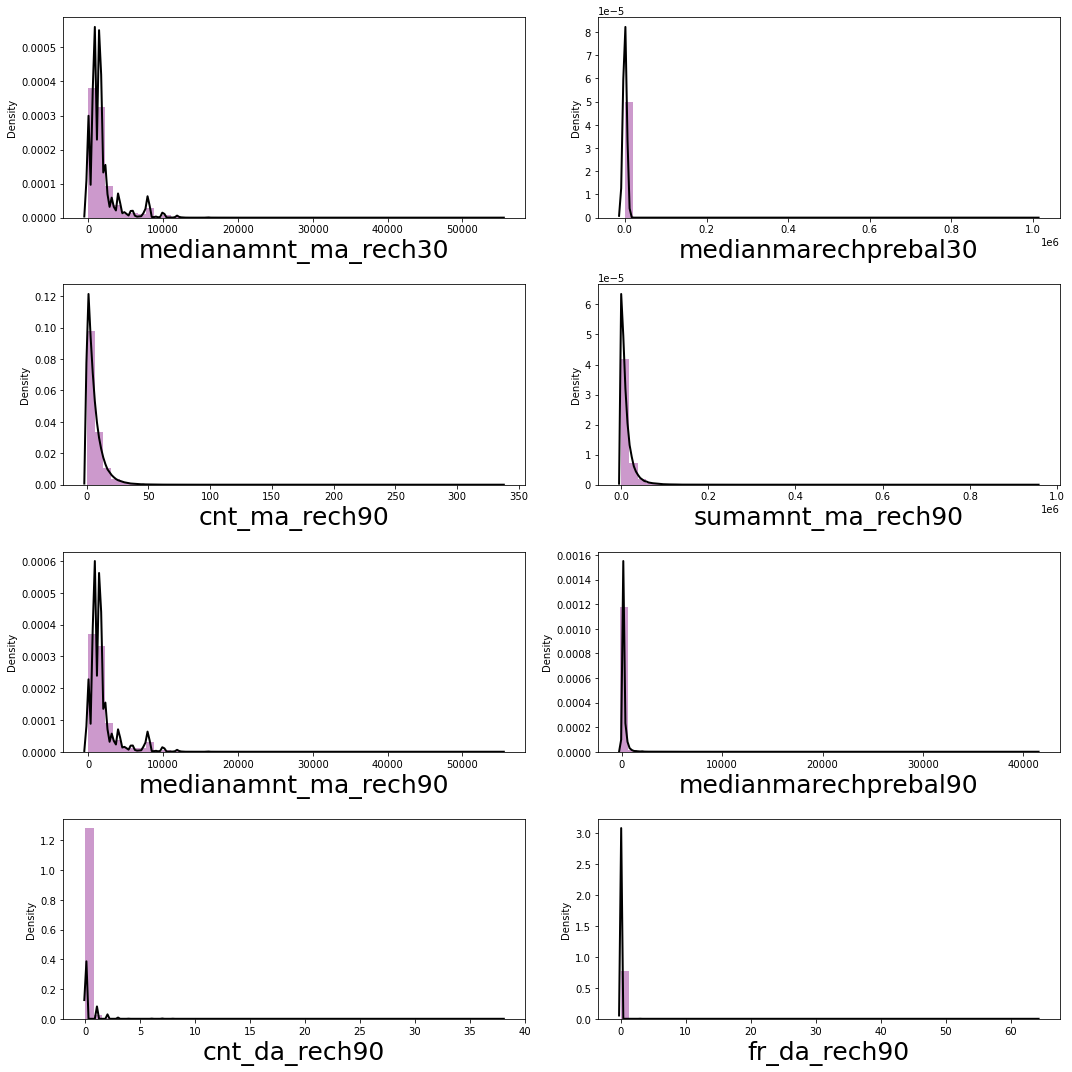

In [55]:
## plotting graph from column number 9 to 16.
plt.figure(figsize=(15,15))
plotnumber=1
for column in df1.columns[8:16]:
    if plotnumber<=8 :
        ax=plt.subplot(4,2,plotnumber)
        sns.distplot(x=df[column],color='purple',kde_kws={"color": "k", "lw": 2, "label": "KDE"})
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

### observation:-
- All Features are highly right skewed. There may be outliers present in my data set we will check it in further steps.

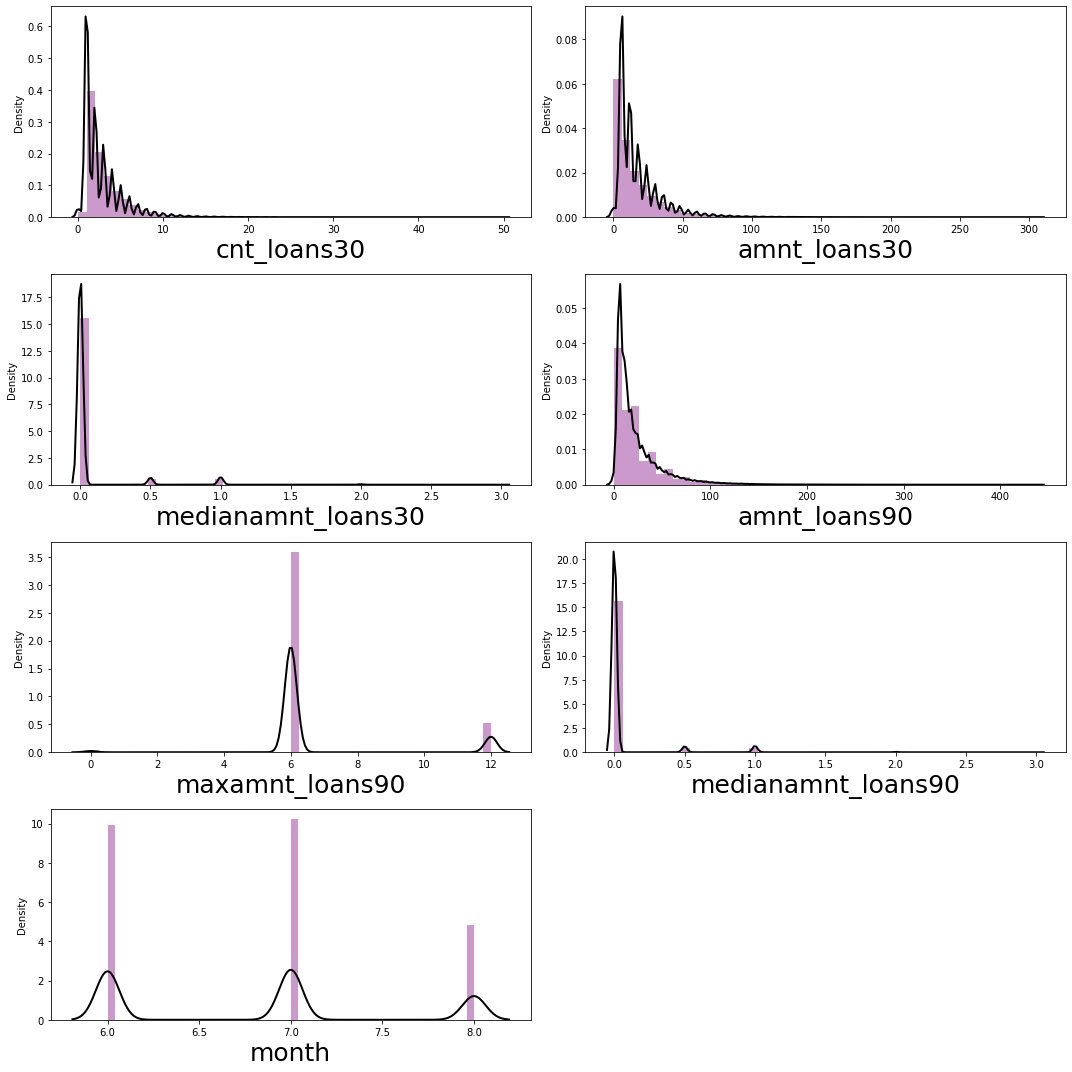

In [56]:
## plotting graph from column number 17 to 24.
plt.figure(figsize=(15,15))
plotnumber=1
for column in df1.columns[16:24]:
    if plotnumber<=8 :
        ax=plt.subplot(4,2,plotnumber)
        sns.distplot(x=df[column],color='purple',kde_kws={"color": "k", "lw": 2, "label": "KDE"})
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

## Observations:-
- we observe that almost all the features are highly right skewed or some are both right or left skewed. We have to handle this skewness otherwise our model become biased.
- `month`, `medianamnt_loans90`,`maxamnt_loans90`,`maxamnt_loans30` features having nomial data points, so we can not treat them in outliers checking. 

## Checking Outliers:

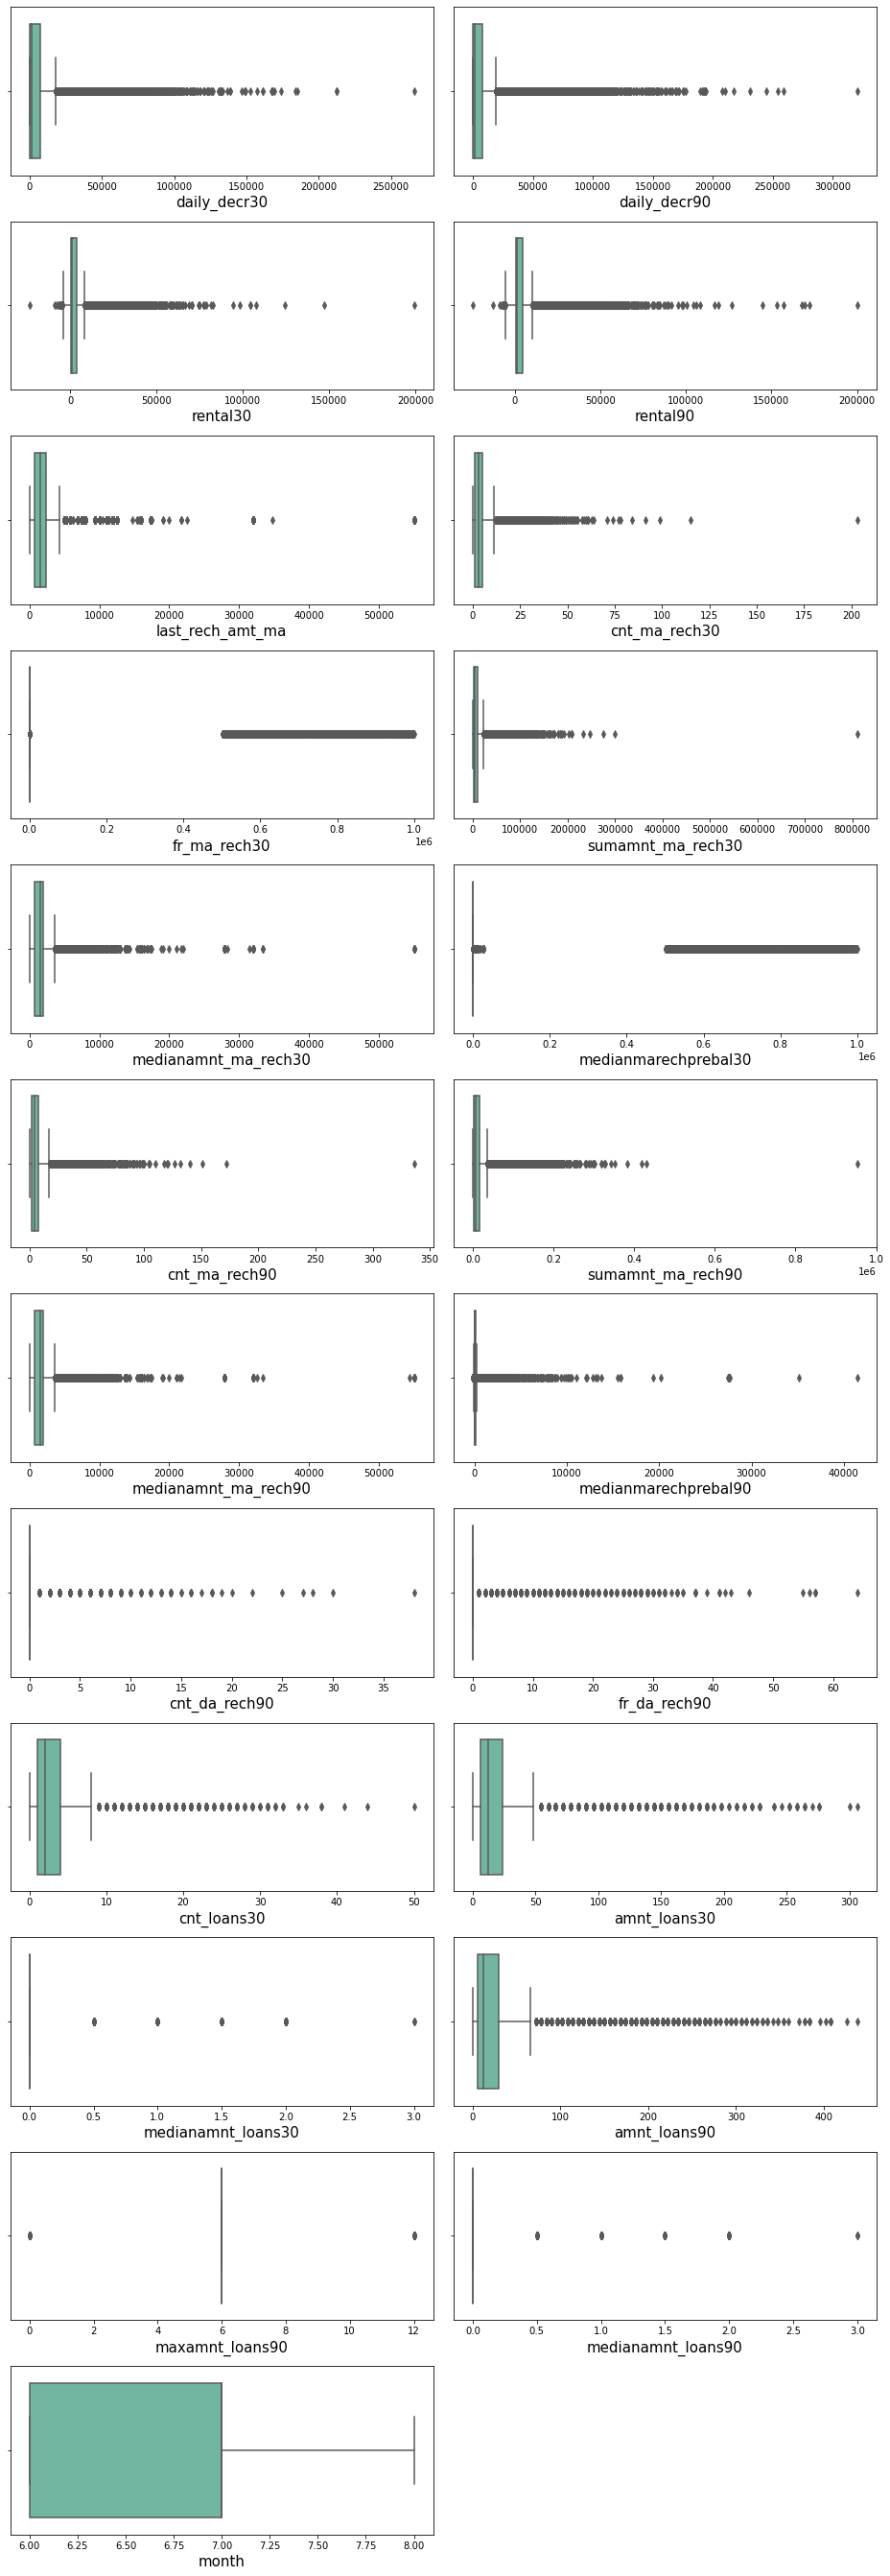

In [57]:
## plotting graph for checking outliers.
plt.figure(figsize=(13,40))
plotnumber=1
for column in df1.columns:
    if plotnumber<=30 :
        ax=plt.subplot(13,2,plotnumber)
        sns.boxplot(x=df[column],color='purple',orient="h", palette="Set2")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

### Observation:
- All the features having outliers present. We have to treat them accodingly.
- as we already said that month, medianamnt_loans90,maxamnt_loans90,maxamnt_loans30 features having nomial data points, so we can not treat them in outliers checking.


## `Handling Outliers`
As we all know data is pricious for us so we can not drop any data as it is. We have checked almost all the features having outlieres present. So we will not check outlier for nomial features. These features are listed below:-
- cnt_da_rech90
- fr_da_rech_90
-  medianamnt_loans30
- maxamnt_loans90
- medianamnt_loans90
- month
-  cnt_loans30
- fr_ma_rech30
- cnt_ma_recch30
In above graph we see that `sumannt_ma_rech30`,`sumannt_ma_rech90`,`rental30`,`rental90`,`last_rech_amt_ma`,`cnt-da-rech90` features having outliers but all outliers are not not really far from maxium data point except one  or tow data points. so we can not treat outliers for them also.

In [58]:
df.columns

Index(['label', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'medianamnt_loans30', 'amnt_loans90', 'maxamnt_loans90',
       'medianamnt_loans90', 'month'],
      dtype='object')

In [59]:
outlier_feature=['daily_decr30', 'daily_decr90','medianamnt_ma_rech90',
       'medianmarechprebal90','amnt_loans30','amnt_loans90']
from scipy.stats import zscore
z_score=zscore(df[outlier_feature])
abs_z_score=np.abs(z_score)

In [60]:
removing_outlier=(abs_z_score<3).all(axis=1)
df_new=df[removing_outlier]
print('Pervious Shape:', df.shape)
print('After removing the new shape : ',df_new.shape)

Pervious Shape: (209593, 24)
After removing the new shape :  (196637, 24)


## Checking Data Loss:

In [61]:
loss=(209593-196637)/209593*100
print('The Data Loss is : ', loss)

The Data Loss is :  6.181504153287562


Data loss is in under acceptable range. So we can go ahead.

# `Heatmap`

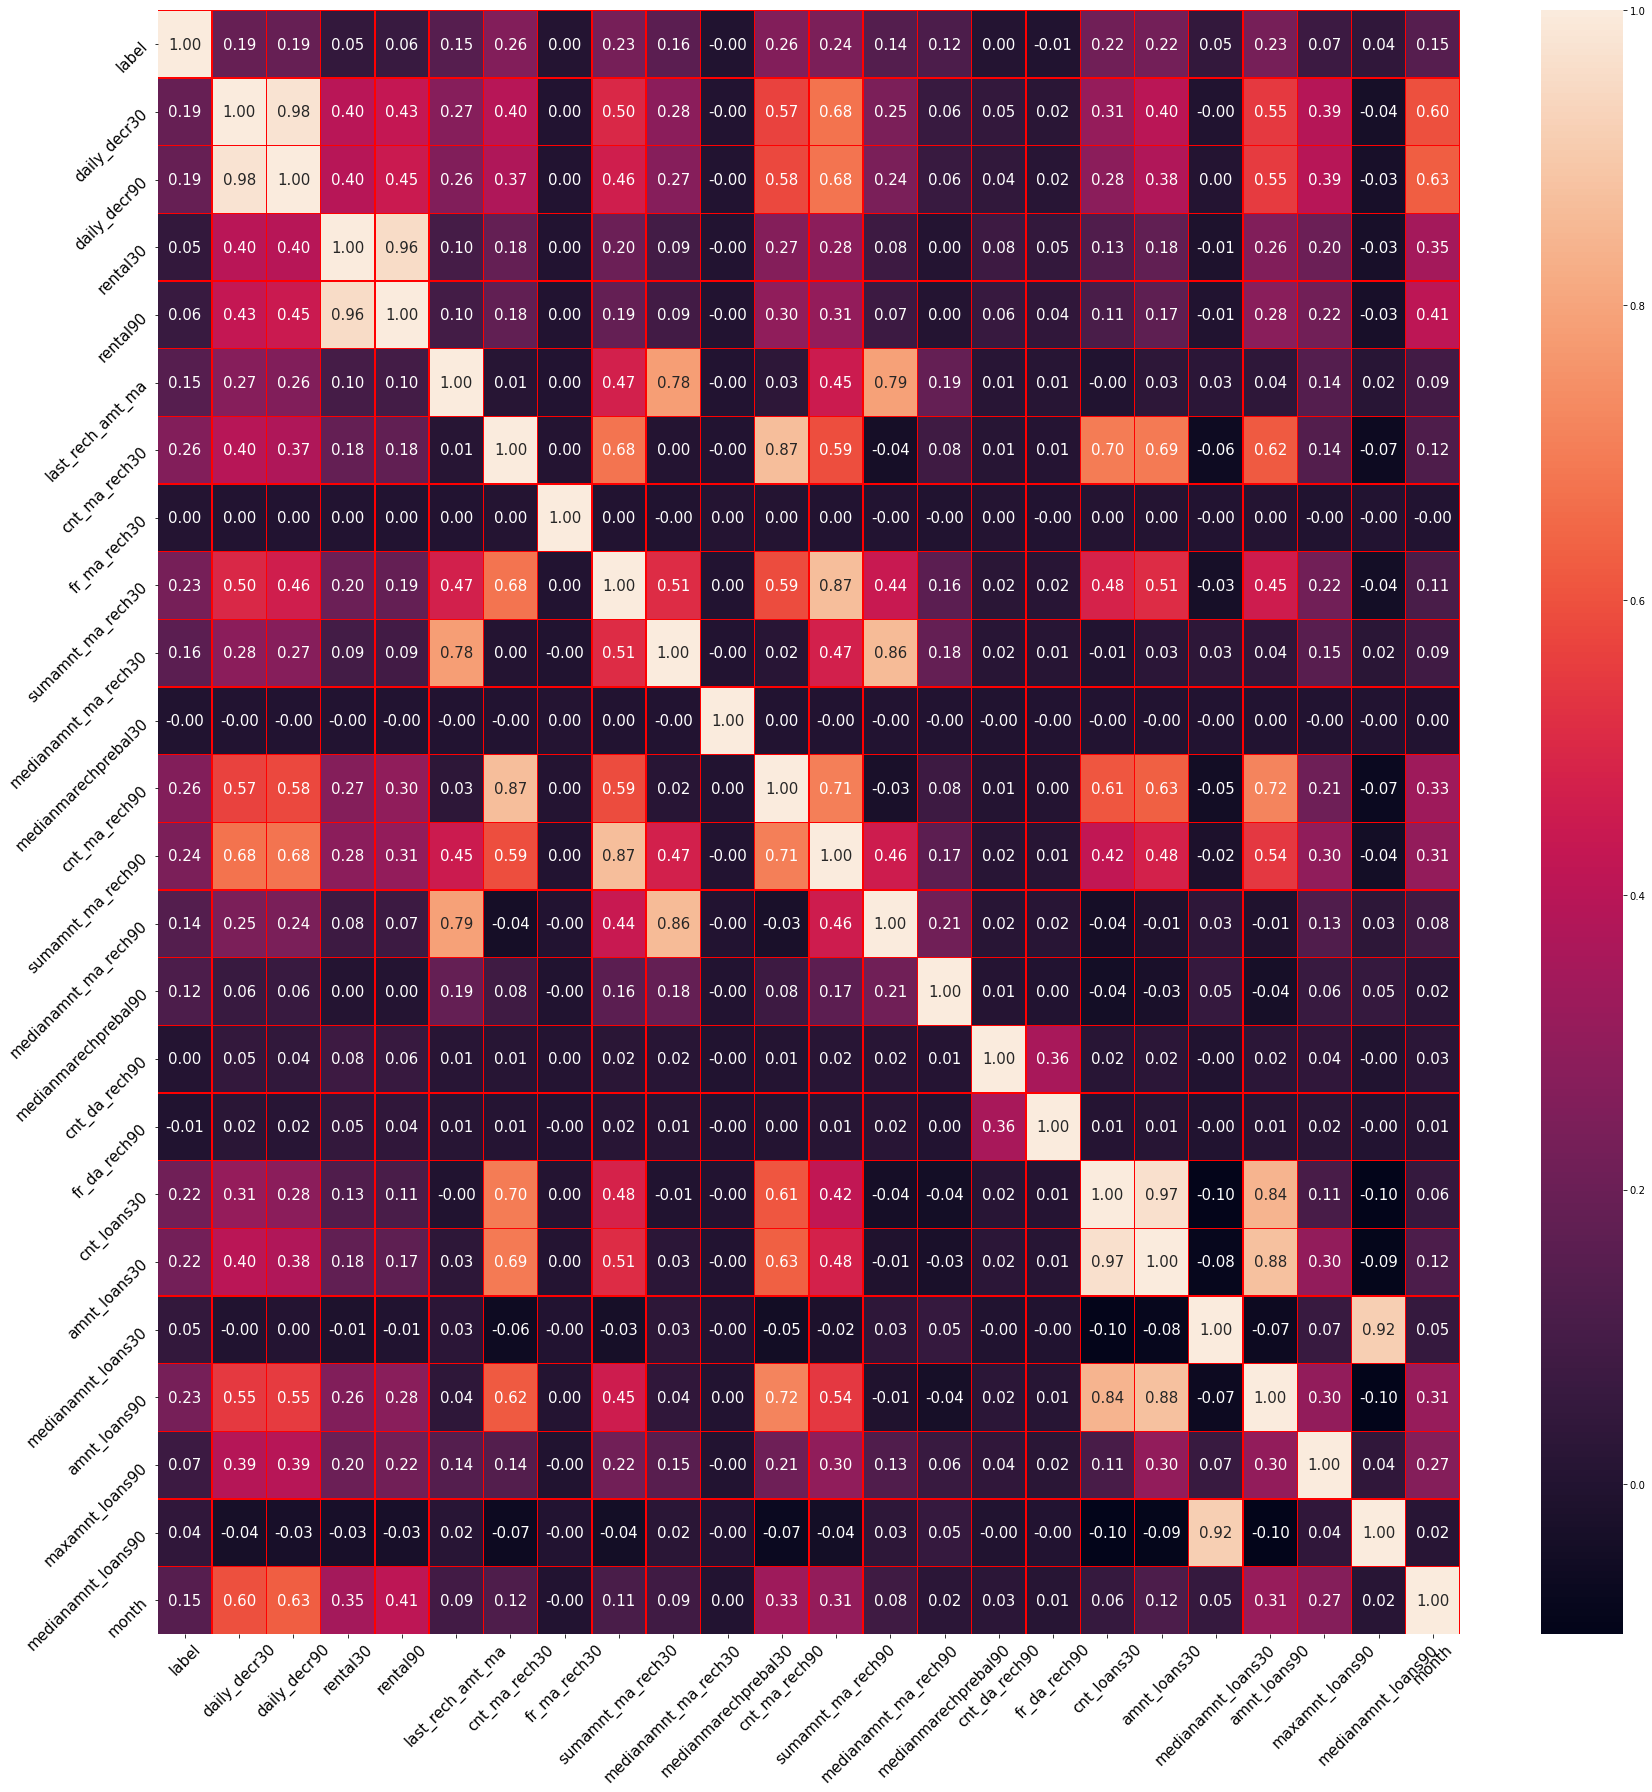

In [62]:
plt.figure(figsize=(25,25))
sns.heatmap(df_new.corr(),annot=True,annot_kws={'size':15},fmt='.2f',linewidth=0.4,linecolor='red')
plt.xticks(rotation=45,fontsize=15)

plt.yticks(rotation=45,fontsize=15)
plt.tight_layout()

## Observation from heatmap:
- we see that `fr_da_rech90` is negative correlated with the target.
- `daily_decr90` and `daily_decr30` is highly 98% correlated with each other.
- `medianamnt_loans90` and `medianamnt-loans30` is also highly correlated with 92% correlation.
- `amnt_loans30` and `amnt_loans90` is also highly correlated with 88% correlation.
- `cnt_loans30` and `amnt_loans90` also 84% correlated with each other.
- `cnt_loans30` is also 97% correlate with `amnt-loans30`.
- `rental90` is 96% correlate with `rental30`.
- `cnt_ma_rech90` is 87% correlated with `cnt_ma-rech30`.
- `medianamnt_ma_rech90` is 86% correlated with `medianamnt-ma-rech30.`

- We can not drop these features based on one evidence. So we will check their relation with each other through graphs.
- After confirming the relation with eachother we will drop one of feature between both of them who is less correlated with target variable.

## Checking Multicollinearity

In [63]:
## defining a function:

def FeatureVsFeature(feature1,feature2):    
    plt.figure(figsize=(18,10))
    plt.subplot(2,1,2)
    sns.scatterplot(x=df_new[feature1],color='purple',y=df_new[feature2])
    plt.title('Relationshing using Scatter plot',fontsize=23)
    plt.ylabel(feature1,fontsize=15)
    plt.xlabel(feature2,fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()

### `daily_decr90` and `daily_decr30`

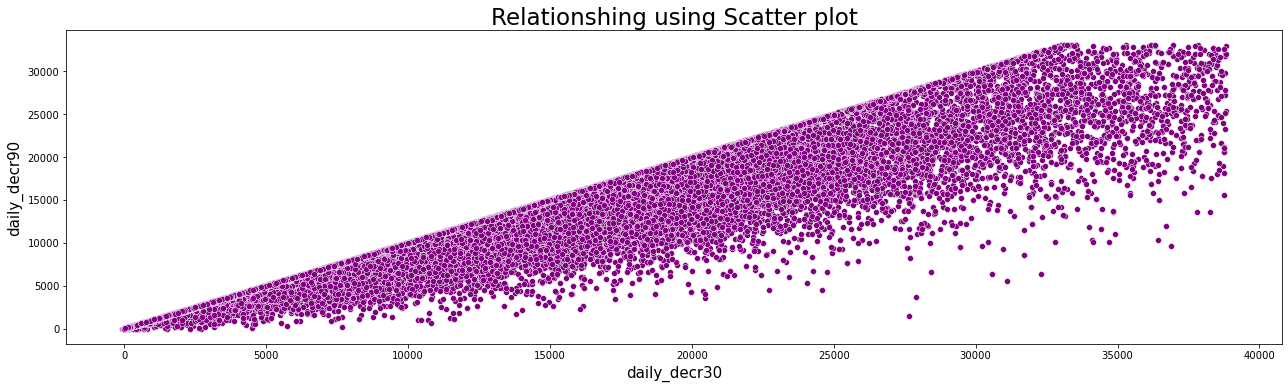

In [64]:
FeatureVsFeature('daily_decr90','daily_decr30')

We can see the clear up trend here. Both features are tightly correlated with each other.

## `medianamnt_loans90` and `medianamnt-loans30`

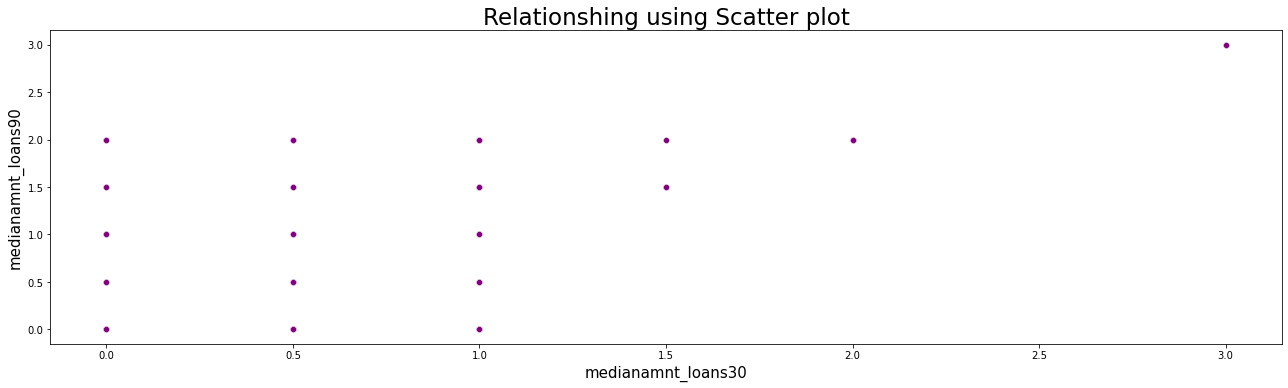

In [66]:
FeatureVsFeature('medianamnt_loans90','medianamnt_loans30')

We can not see that much of up or down trend here. So here we can say that no relation with feature vs feature.

## `amnt_loans30` and `amnt_loans90`

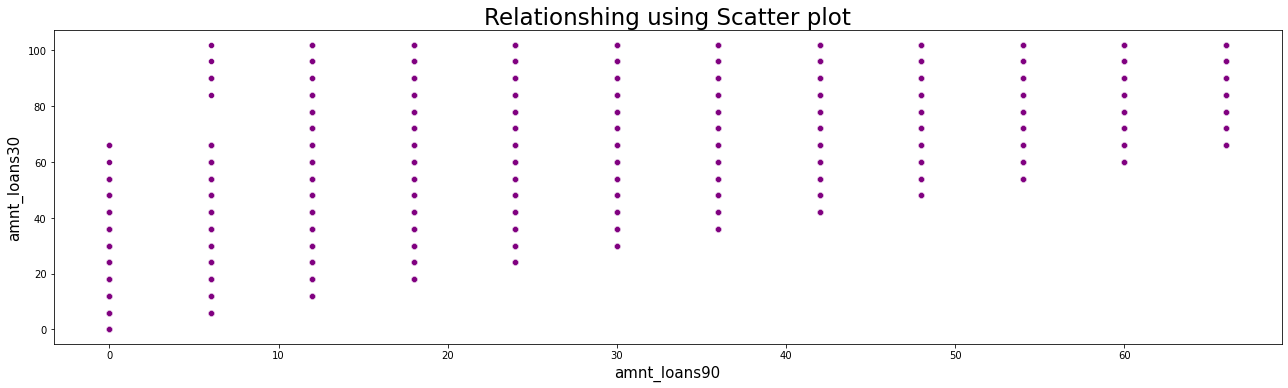

In [67]:
FeatureVsFeature('amnt_loans30','amnt_loans90')

yes, here we can see the great up trend. So there is high correlation between these two features.

## `cnt_loans30` and `amnt_loans90`

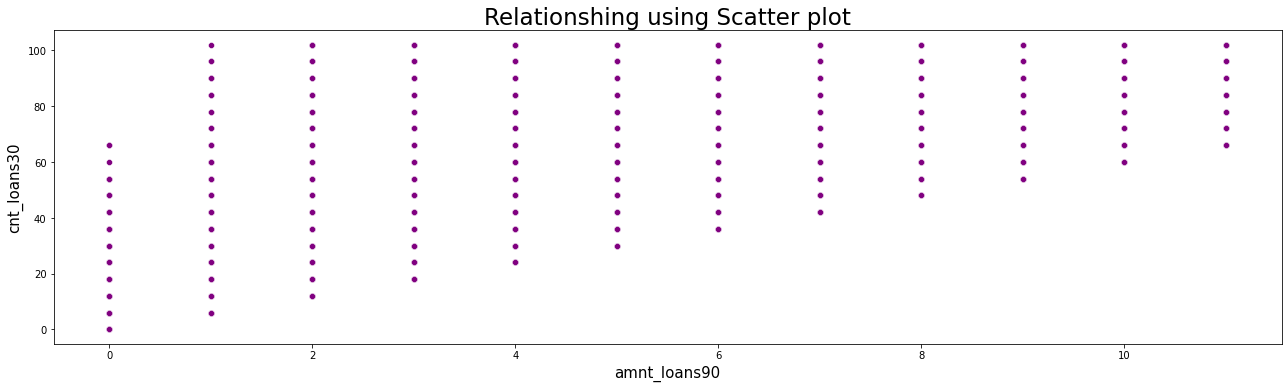

In [68]:
FeatureVsFeature('cnt_loans30','amnt_loans90')

So here we also see the high correlation between features.

## `cnt_loans30` & `amnt-loans30`

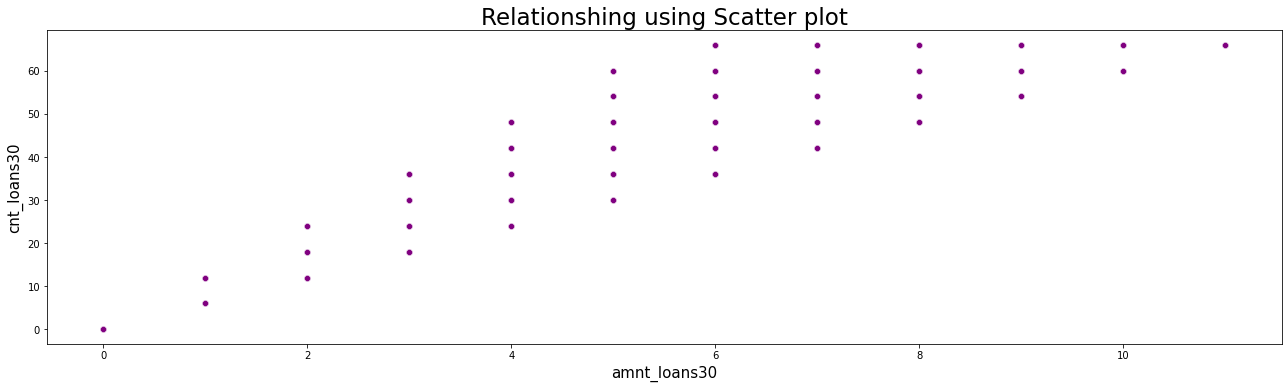

In [69]:
FeatureVsFeature('cnt_loans30','amnt_loans30')

Yes...!! , Here we find the high relation between these two features.

## `cnt_ma_rech90` & `cnt_ma-rech30`

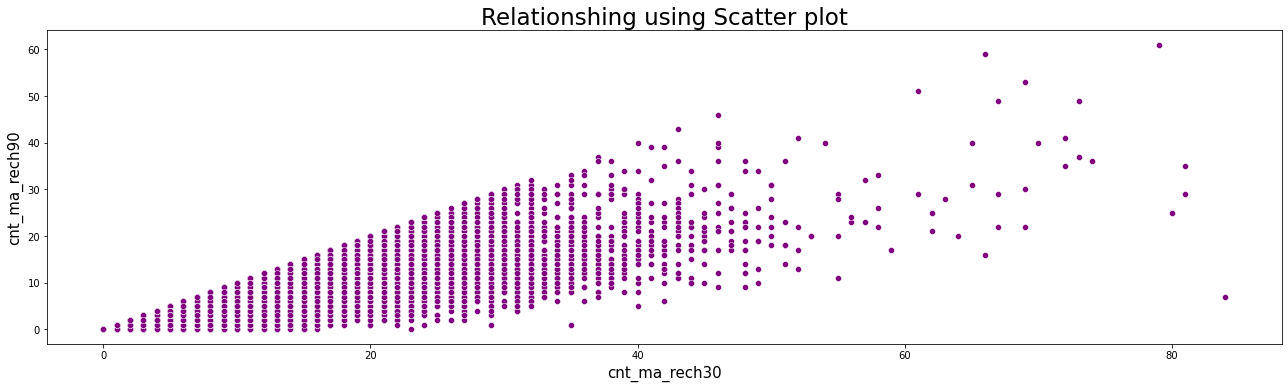

In [70]:
FeatureVsFeature('cnt_ma_rech90','cnt_ma_rech30')

## `Rental30 vs Rental90`

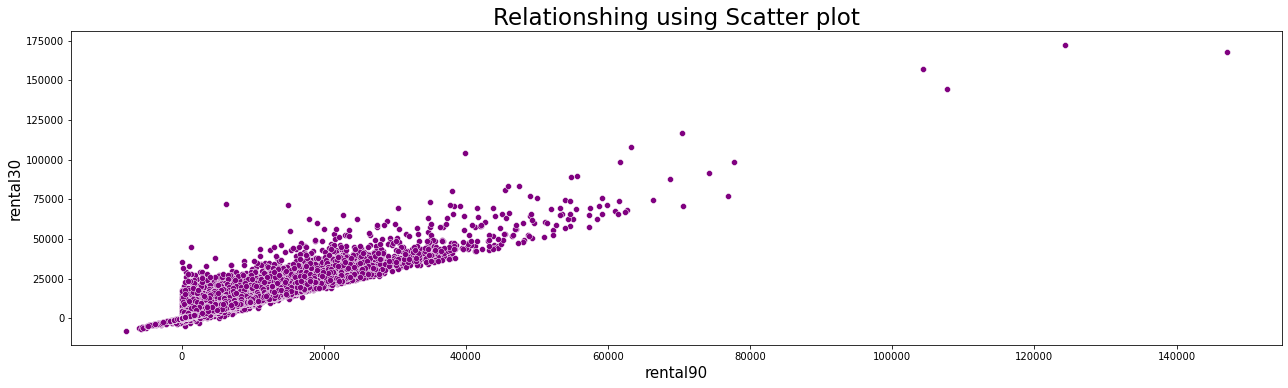

In [71]:
FeatureVsFeature('rental30','rental90')

here, we can see that the up-trend. It mean there is some relation between these features.

## `medianamnt_ma_rech90` &`medianamnt-ma-rech30`

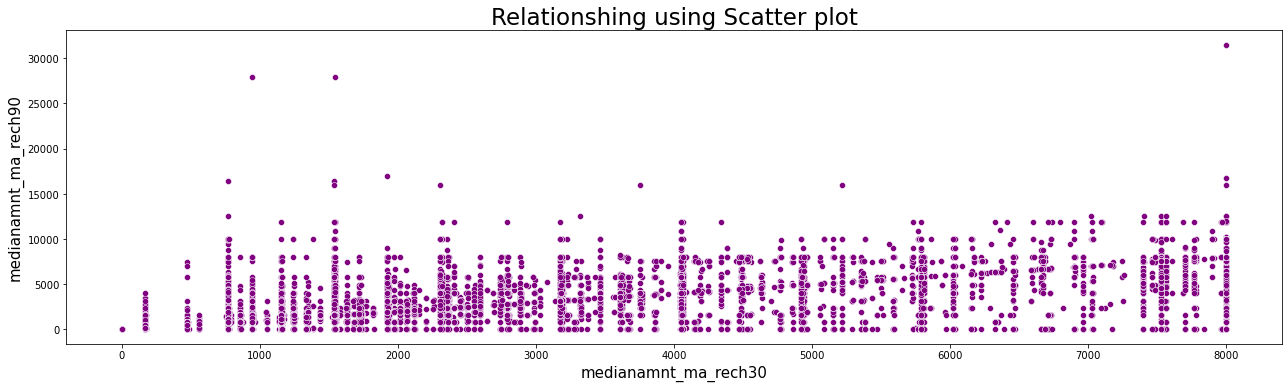

In [72]:
FeatureVsFeature('medianamnt_ma_rech90','medianamnt_ma_rech30')

But, here we see that there is No  relation between these feature. We can not  see any up trend here.

## Conclusion of Multicollinearity.
-  `daily_decr90` and `daily_decr30` is highly correlated & both are 19% correlated with target so we will drop `daily_decr30` here.
- We did not find any relation between `medianamnt_loans90` and `medianamnt-loans30`.
- `amnt_loans30` and `amnt_loans90` is also highly correlated & both are 22% and 23% correlated with target respectvely.
- `cnt-loans30` is also correlated with `amnt_loans90`. so we will drop `cnt-loans30` here
- `cnt_loans30` is also 97% correlate with `amnt-loans30` so will drop cnt_loans 30 here.
- `rental90` is 96% correlate with `rental30` & both are 0.06% and 0.05% related with target respectvely so we will drop `rental30` here.
- `cnt_ma_rech90` is 87% correlated with `cnt_ma-rech30` and both are 26% correlated with target so we will drop `cnt_ma_rech30` here.
- We did not find any relation between `medianamnt_ma_rech90` with `medianamnt-ma-rech30`.

In [65]:
df_new=df_new.drop(columns=['daily_decr30','amnt_loans30','cnt_loans30','rental30','cnt_ma_rech30'])

In [66]:
print(df_new.shape)
df_new.head()

(196637, 19)


,label,daily_decr90,rental90,last_rech_amt_ma,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,fr_da_rech90,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,month
0,0,3065.150000,260.13,1539,21.0,3078.0,1539.0,7.50,2,3078,1539.0,7.50,0,0,0.0,12,6,0.0,7
1,1,12124.750000,3691.26,5787,0.0,5787.0,5787.0,61.04,1,5787,5787.0,61.04,0,0,0.0,12,12,0.0,8
2,1,1398.000000,900.13,1539,0.0,1539.0,1539.0,66.32,1,1539,1539.0,66.32,0,0,0.0,6,6,0.0,8
3,1,21.228000,159.42,947,0.0,0.0,0.0,0.00,1,947,947.0,2.50,0,0,0.0,12,6,0.0,6
4,1,150.619333,1098.90,2309,2.0,20029.0,2309.0,29.00,8,23496,2888.0,35.00,0,0,0.0,42,6,0.0,6


## Relation With Target:

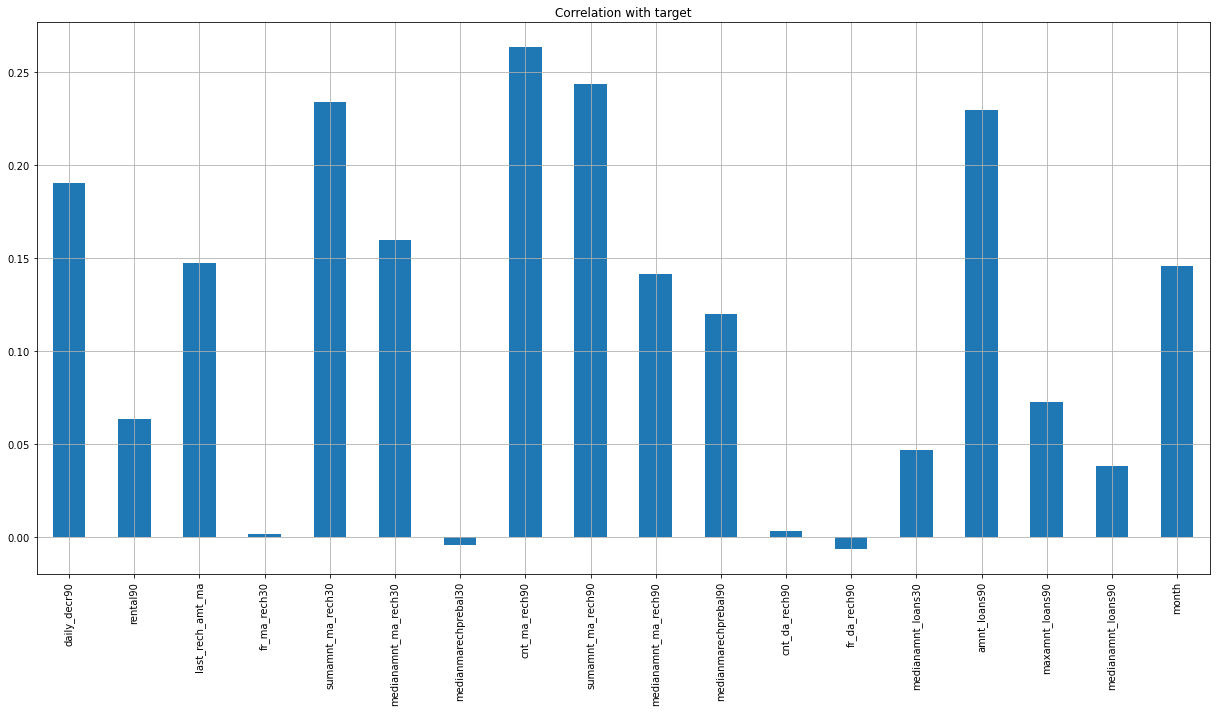

In [67]:
df_new.drop('label',axis=1).corrwith(df_new.label).plot(kind='bar',grid=True,figsize=(17,10),title='Correlation with target')
plt.tight_layout()

- `cnt_ma_rech90` is high correlated with target.
- `fr_ma_rech30` is least correlated with target.

## Checking Skewness:

In [68]:
df_new.skew()

label                   -2.186101
daily_decr90             1.990263
rental90                 4.380219
last_rech_amt_ma         2.671435
fr_ma_rech30            14.764050
sumamnt_ma_rech30        2.875017
medianamnt_ma_rech30     2.384533
medianmarechprebal30    14.726477
cnt_ma_rech90            2.081323
sumamnt_ma_rech90        2.397616
medianamnt_ma_rech90     2.276276
medianmarechprebal90     3.623945
cnt_da_rech90           27.928307
fr_da_rech90            30.136185
medianamnt_loans30       4.531760
amnt_loans90             1.712200
maxamnt_loans90          1.844849
medianamnt_loans90       4.865652
month                    0.395402
dtype: float64

here we can see that all the features are highly skewed. We have to handle them accordingly.

In [69]:
df1=df_new.copy()

In [70]:
df_new.head()

,label,daily_decr90,rental90,last_rech_amt_ma,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,fr_da_rech90,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,month
0,0,3065.150000,260.13,1539,21.0,3078.0,1539.0,7.50,2,3078,1539.0,7.50,0,0,0.0,12,6,0.0,7
1,1,12124.750000,3691.26,5787,0.0,5787.0,5787.0,61.04,1,5787,5787.0,61.04,0,0,0.0,12,12,0.0,8
2,1,1398.000000,900.13,1539,0.0,1539.0,1539.0,66.32,1,1539,1539.0,66.32,0,0,0.0,6,6,0.0,8
3,1,21.228000,159.42,947,0.0,0.0,0.0,0.00,1,947,947.0,2.50,0,0,0.0,12,6,0.0,6
4,1,150.619333,1098.90,2309,2.0,20029.0,2309.0,29.00,8,23496,2888.0,35.00,0,0,0.0,42,6,0.0,6


In [71]:
df_new.columns

Index(['label', 'daily_decr90', 'rental90', 'last_rech_amt_ma', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech90', 'fr_da_rech90',
       'medianamnt_loans30', 'amnt_loans90', 'maxamnt_loans90',
       'medianamnt_loans90', 'month'],
      dtype='object')

In [72]:
feature=['daily_decr90', 'rental90', 'last_rech_amt_ma', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'amnt_loans90']

for i in feature:
    df_new[i]=np.cbrt(df_new[i])
df_new.skew()

label                   -2.186101
daily_decr90             0.442361
rental90                 0.202705
last_rech_amt_ma        -0.577155
fr_ma_rech30            13.674708
sumamnt_ma_rech30       -0.423210
medianamnt_ma_rech30    -0.715236
medianmarechprebal30    11.721843
cnt_ma_rech90           -0.557688
sumamnt_ma_rech90       -0.297338
medianamnt_ma_rech90    -0.758152
medianmarechprebal90    -0.264553
cnt_da_rech90           27.928307
fr_da_rech90            30.136185
medianamnt_loans30       4.531760
amnt_loans90             0.378695
maxamnt_loans90          1.844849
medianamnt_loans90       4.865652
month                    0.395402
dtype: float64

 Almost all the features skewness has handled. Some nomial features are listed below , we will not handle their skewness.
- month
- medianamnt_loans90
- maxamnt_loands90
-  medianamnt_loans30
- fr_da_rech90
- cnt-da_rech90

In [73]:
### 'fr_ma_rech30' skewness handle with power transformer
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
df_new['fr_ma_rech30']=pt.fit_transform(df_new['fr_ma_rech30'].values.reshape(-1,1))
df_new['medianmarechprebal30']=pt.fit_transform(df_new['medianmarechprebal30'].values.reshape(-1,1))

In [74]:
df_new.skew()

label                   -2.186101
daily_decr90             0.442361
rental90                 0.202705
last_rech_amt_ma        -0.577155
fr_ma_rech30             0.001389
sumamnt_ma_rech30       -0.423210
medianamnt_ma_rech30    -0.715236
medianmarechprebal30     0.860463
cnt_ma_rech90           -0.557688
sumamnt_ma_rech90       -0.297338
medianamnt_ma_rech90    -0.758152
medianmarechprebal90    -0.264553
cnt_da_rech90           27.928307
fr_da_rech90            30.136185
medianamnt_loans30       4.531760
amnt_loans90             0.378695
maxamnt_loans90          1.844849
medianamnt_loans90       4.865652
month                    0.395402
dtype: float64

We have handled all the  necessary features skewness.

In [75]:
df_new.head()

,label,daily_decr90,rental90,last_rech_amt_ma,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,fr_da_rech90,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,month
0,0,14.526152,6.383568,11.545503,1.257058,14.546423,11.545503,-0.284438,1.259921,14.546423,11.545503,1.957434,0,0,0.0,2.289428,6,0.0,7
1,1,22.973347,15.454616,17.953584,-1.195277,17.953584,17.953584,0.256627,1.000000,17.953584,17.953584,3.937357,0,0,0.0,2.289428,12,0.0,8
2,1,11.181560,9.655359,11.545503,-1.195277,11.545503,11.545503,0.283298,1.000000,11.545503,11.545503,4.047761,0,0,0.0,1.817121,6,0.0,8
3,1,2.768873,5.422267,9.820117,-1.195277,0.000000,0.000000,-1.054658,1.000000,9.820117,9.820117,1.357209,0,0,0.0,2.289428,6,0.0,6
4,1,5.320595,10.319359,13.217256,0.454040,27.157290,13.217256,0.036578,2.000000,28.641646,14.240735,3.271066,0,0,0.0,3.476027,6,0.0,6


## Checking Distribution Through Graph

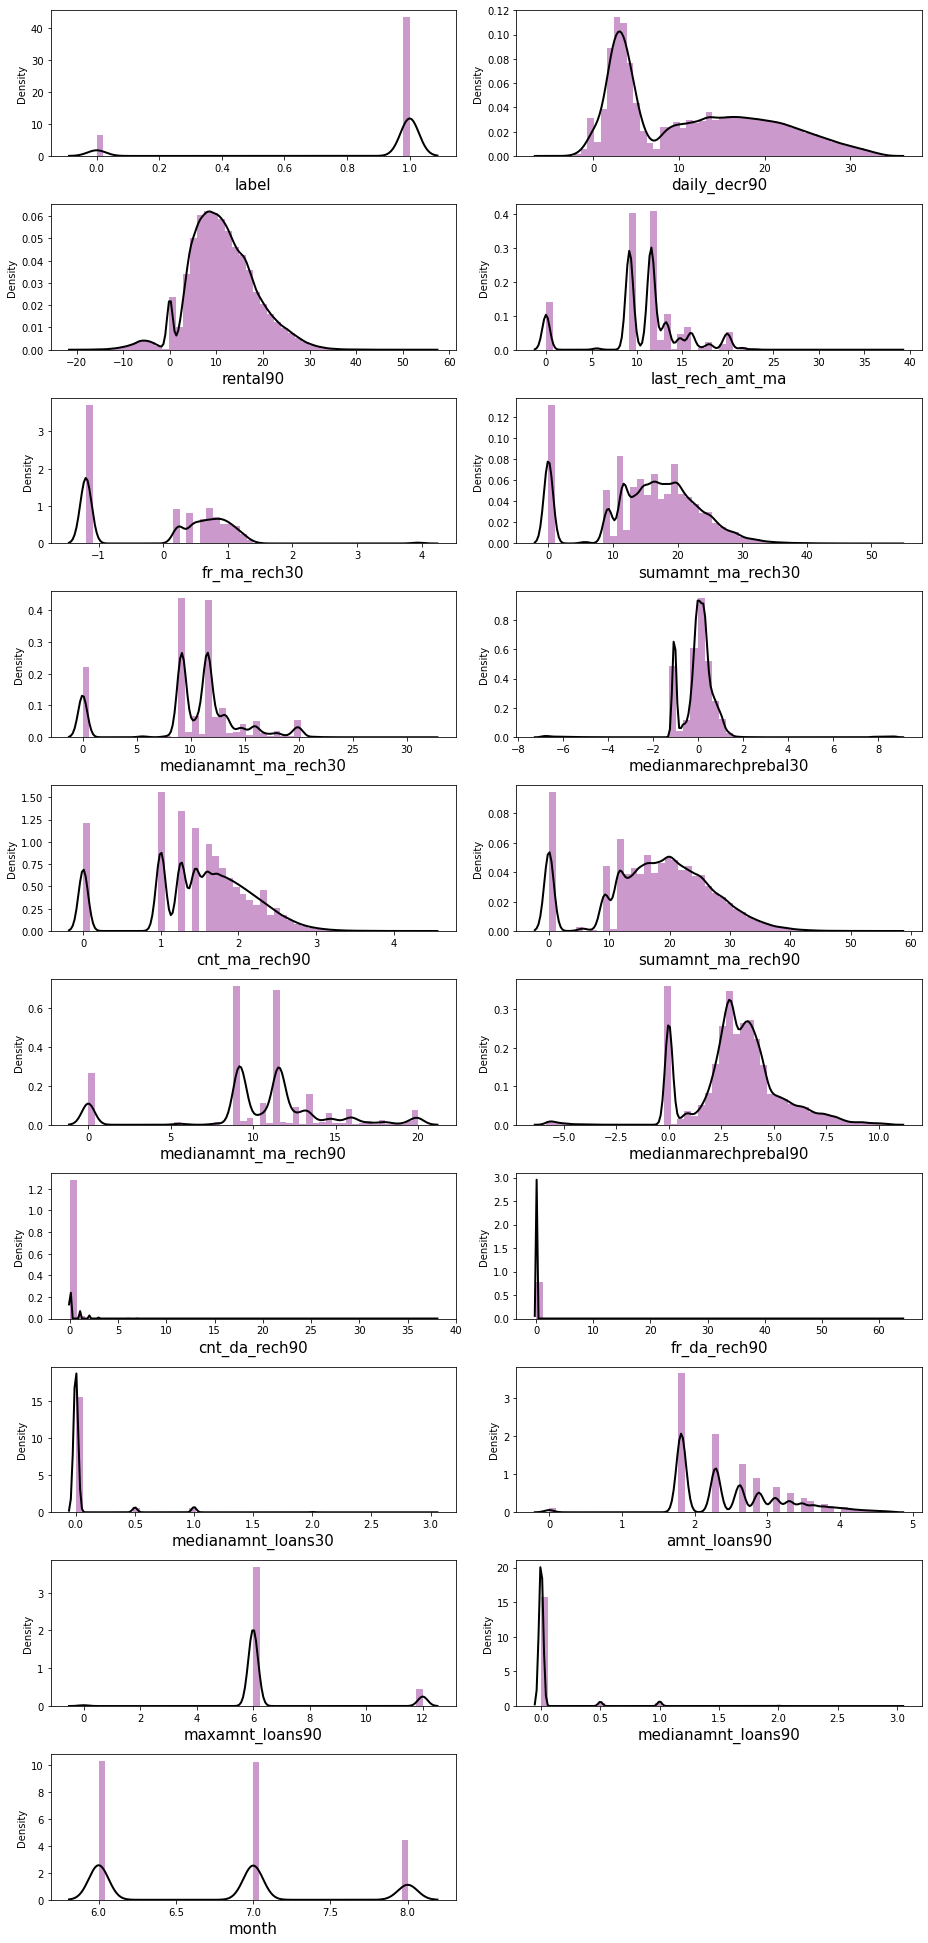

In [76]:
## plotting graph for checking skewness.
plt.figure(figsize=(13,40))
plotnumber=1
for column in df_new.columns:
    if plotnumber<=30 :
        ax=plt.subplot(15,2,plotnumber)
        sns.distplot(x=df_new[column],color='purple',kde_kws={"color": "k", "lw": 2, "label": "KDE"})
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

quite find distribution Now. Let's go ahead.

## Splitting And Standarization:

In [77]:
## splitting  target and feature
x=df_new.drop('label',axis=1)
y=df_new['label']
x.isna().sum()

daily_decr90            0
rental90                0
last_rech_amt_ma        0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech90           0
fr_da_rech90            0
medianamnt_loans30      0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
month                   0
dtype: int64

In [78]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [79]:
## scalling:-
for i in x.columns:
    x[i]=scaler.fit_transform(x[i].values.reshape(-1,1))
x.head()

,daily_decr90,rental90,last_rech_amt_ma,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,fr_da_rech90,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,month
0,0.329122,-0.681137,0.174601,1.257058,-0.113046,0.299680,-0.284438,-0.365377,-0.395488,0.250285,-0.630617,-0.104831,-0.046626,-0.249005,-0.302380,-0.301679,-0.231408,0.319308
1,1.288208,0.604922,1.528458,-1.195277,0.308601,1.626667,0.256627,-0.734654,-0.017705,1.686236,0.330673,-0.104831,-0.046626,-0.249005,-0.302380,2.732499,-0.231408,1.684466
2,-0.050620,-0.217275,0.174601,-1.195277,-0.484418,0.299680,0.283298,-0.734654,-0.728226,0.250285,0.384276,-0.104831,-0.046626,-0.249005,-0.929700,-0.301679,-0.231408,1.684466
3,-1.005788,-0.817426,-0.189927,-1.195277,-1.913208,-2.091166,-1.054658,-0.734654,-0.919536,-0.136347,-0.922038,-0.104831,-0.046626,-0.249005,-0.302380,-0.301679,-0.231408,-1.045851
4,-0.716068,-0.123135,0.527798,0.454040,1.447586,0.645867,0.036578,0.686075,1.167376,0.854244,0.007176,-0.104831,-0.046626,-0.249005,1.273661,-0.301679,-0.231408,-1.045851


# `Model Building:-`

In [80]:
y.value_counts()

1    170859
0     25778
Name: label, dtype: int64

Our dataset is imbalanced dataset. We have to handle it. We have SMOTE technique for handle this kind of problems.

In [81]:
## importing smote

from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [82]:
### importing train test 
from sklearn.model_selection import train_test_split

In [83]:
### importing the models
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
etc=ExtraTreesClassifier()
rf=RandomForestClassifier()
adc=AdaBoostClassifier()
gbdt=GradientBoostingClassifier()
from sklearn.svm import SVC
svc=SVC()
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [84]:
#### importing metrics
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

### importing curve metrics
from sklearn.metrics import roc_curve,auc,roc_auc_score

## importing cross validation
from sklearn.model_selection import cross_val_score

## Define A Function For Finding The Best Random State:

In [85]:
def Best_random_state(model,feature,target):
    minimum=0
    for i in range(1,21):
        x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.25,random_state=i)
        over_sampling=SMOTE(0.80)
        x_train_new,y_train_new=over_sampling.fit_resample(x_train,y_train)
        model.fit(x_train_new,y_train_new)
        train=model.predict(x_train)
        test=model.predict(x_test)
        roc_score=roc_auc_score(y_test,test)
        print("Random State : ", i)
        print("The ROC_AUC Score is : ", roc_score)
        print('\n')
        if roc_score>minimum:
            
            minimum=roc_score
            j=i
    return j
        

## Define A Function For Evaluation:

In [86]:
def print_score(Model,independent,dependent,i,train=True):
    x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.25,random_state=i)
    over_sampling=SMOTE(0.80)
    x_train_new,y_train_new=over_sampling.fit_resample(x_train,y_train)
    Model.fit(x_train_new,y_train_new)
    if train:
        prediction=Model.predict(x_train_new)
        print('After Oversampling the  new shape of Xtrain is : ',x_train_new.shape)
        print("After oversampling the new shape of Ytrain is : ",y_train_new.shape)
        print("\n********************Traning Scores****************************\n")
        print("Accuracy Score is {} for Training Model.".format(accuracy_score(y_train_new,prediction)))
        print("\n F1 Score for the model is : \n", f1_score(y_train_new,prediction))
        print("\n*******************Confusion Matrix***************************\n")
        print(confusion_matrix(y_train_new,prediction))
        print("\n\n Training Classification Report \n",classification_report(y_train_new,prediction))
    
    if train==False:
        pred=Model.predict(x_test)
        print("\n\n")
        print("***********************Testing Scores******************************\n")
        print("Accuracy score for testing is : ", accuracy_score(y_test,pred))
        print("\n F1 Score for testing is : ", f1_score(y_test,pred))
        print("Confusion Matrix : \n",confusion_matrix(y_test,pred))
        print("\n The Classification report for Testing \n", classification_report(y_test,pred))

## Define A Function For Cross Validation:

In [87]:
def Cross_validation(clf,X,Y,Best_RandomState):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=Best_RandomState)
    over_sampling=SMOTE(0.80)
    x_train_new,y_train_new=over_sampling.fit_resample(x_train,y_train)
    clf.fit(x_train_new,y_train_new)
    pred_y=clf.predict(x_test)
    for i in range(2,11):
        score=cross_val_score(clf,X,Y,cv=i)
        mean=score.mean()
        print("\nAt Random State {}, the cross validation score of the model is {}. And accuracy Score is {} ".format(i,mean,accuracy_score(y_test,pred_y)))
        print("\n The difference between corss val score and Accuaracy score is : ", mean-accuracy_score(y_test,pred_y)) 

## 1. Logistic Regression:

In [96]:
## finding the best random State:

Best_random_state(lr,x,y)

Random State :  1
The ROC_AUC Score is :  0.7509836616396259


Random State :  2
The ROC_AUC Score is :  0.7484829248321135


Random State :  3
The ROC_AUC Score is :  0.7514783124121646


Random State :  4
The ROC_AUC Score is :  0.7475947942626209


Random State :  5
The ROC_AUC Score is :  0.7557670119351734


Random State :  6
The ROC_AUC Score is :  0.749431600348488


Random State :  7
The ROC_AUC Score is :  0.7525961240298831


Random State :  8
The ROC_AUC Score is :  0.7511580925950312


Random State :  9
The ROC_AUC Score is :  0.752632828847785


Random State :  10
The ROC_AUC Score is :  0.7495532118724472


Random State :  11
The ROC_AUC Score is :  0.7531679191687782


Random State :  12
The ROC_AUC Score is :  0.7553631721263823


Random State :  13
The ROC_AUC Score is :  0.7510973396602418


Random State :  14
The ROC_AUC Score is :  0.7532233432977772


Random State :  15
The ROC_AUC Score is :  0.7495521176403146


Random State :  16
The ROC_AUC Score is :  0.751250

5

In [97]:
## printing scores
print(print_score(lr,x,y,5,train=True))
print(print_score(lr,x,y,5,train=False))

After Oversampling the  new shape of Xtrain is :  (230693, 18)
After oversampling the new shape of Ytrain is :  (230693,)

********************Traning Scores****************************

Accuracy Score is 0.7576649486547056 for Training Model.

 F1 Score for the model is : 
 0.7817157404406683

*******************Confusion Matrix***************************

[[ 74685  27845]
 [ 28060 100103]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.73      0.73      0.73    102530
           1       0.78      0.78      0.78    128163

    accuracy                           0.76    230693
   macro avg       0.75      0.75      0.75    230693
weighted avg       0.76      0.76      0.76    230693

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.7755899104963385

 F1 Score for testing is :  0.858331621121841
Confusion Matrix : 
 [[ 4708  1756]
 [ 9276 33420]]

 The Classifi

In [98]:
## checking cross validation
Cross_validation(lr,x,y,5)


At Random State 2, the cross validation score of the model is 0.8742454417789879. And accuracy Score is 0.7762815296989423 

 The difference between corss val score and Accuaracy score is :  0.09796391208004562

At Random State 3, the cross validation score of the model is 0.8745302272135943. And accuracy Score is 0.7762815296989423 

 The difference between corss val score and Accuaracy score is :  0.09824869751465204

At Random State 4, the cross validation score of the model is 0.87459124951166. And accuracy Score is 0.7762815296989423 

 The difference between corss val score and Accuaracy score is :  0.09830971981271774

At Random State 5, the cross validation score of the model is 0.8745403955884445. And accuracy Score is 0.7762815296989423 

 The difference between corss val score and Accuaracy score is :  0.09825886588950228

At Random State 6, the cross validation score of the model is 0.8745912588674946. And accuracy Score is 0.7762815296989423 

 The difference between cors

## 2. K-Nearest Neighbors

In [ ]:
## finding the best random State:

Best_random_state(knn,x,y)

In [ ]:
## printing scores
print(print_score(knn,x,y,19,train=True))
print(print_score(knn,x,y,19,train=False))

In [ ]:
## checking cross validation
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=19)
over_sampling=SMOTE(0.80)
x_train_new,y_train_new=over_sampling.fit_resample(x_train,y_train)
knn.fit(x_train_new,y_train_new)
pred_y=knn.predict(x_test)
score=cross_val_score(knn,x,y,cv=5)
mean=score.mean()
print("\nAt Random State {}, the cross validation score of the model is {}. And accuracy Score is {} ".format(i,mean,accuracy_score(y_test,pred_y)))
print("\n The difference between corss val score and Accuaracy score is : ", mean-accuracy_score(y_test,pred_y)) 

## 3. Decision Tree Classifier:-

In [96]:
## finding the best random State:

Best_random_state(dt,x,y)

Random State :  1
The ROC_AUC Score is :  0.7336336478571993


Random State :  2
The ROC_AUC Score is :  0.7341999409991087


Random State :  3
The ROC_AUC Score is :  0.7349805857198853


Random State :  4
The ROC_AUC Score is :  0.7345384872238983


Random State :  5
The ROC_AUC Score is :  0.7366999505599802


Random State :  6
The ROC_AUC Score is :  0.7338698729629303


Random State :  7
The ROC_AUC Score is :  0.740991914084695


Random State :  8
The ROC_AUC Score is :  0.7369493596602754


Random State :  9
The ROC_AUC Score is :  0.7358074012518478


Random State :  10
The ROC_AUC Score is :  0.7313214202944052


Random State :  11
The ROC_AUC Score is :  0.7329920771286751


Random State :  12
The ROC_AUC Score is :  0.7421321593766109


Random State :  13
The ROC_AUC Score is :  0.7343437034205371


Random State :  14
The ROC_AUC Score is :  0.7351859394256197


Random State :  15
The ROC_AUC Score is :  0.7308171171687621


Random State :  16
The ROC_AUC Score is :  0.73161

12

In [96]:
## printing scores
print(print_score(dt,x,y,12,train=True))
print(print_score(dt,x,y,12,train=False))

After Oversampling the  new shape of Xtrain is :  (230783, 18)
After oversampling the new shape of Ytrain is :  (230783,)

********************Traning Scores****************************

Accuracy Score is 0.9987607406091437 for Training Model.

 F1 Score for the model is : 
 0.998883501588863

*******************Confusion Matrix***************************

[[102561      9]
 [   277 127936]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    102570
           1       1.00      1.00      1.00    128213

    accuracy                           1.00    230783
   macro avg       1.00      1.00      1.00    230783
weighted avg       1.00      1.00      1.00    230783

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.8497558991049634

 F1 Score for testing is :  0.9112899351429258
Confusion Matrix : 
 [[ 3837  2677]
 [ 4709 37937]]

 The Classifi

In [97]:
## checking cross validation
Cross_validation(dt,x,y,12)


At Random State 2, the cross validation score of the model is 0.8655390385224957. And accuracy Score is 0.8478234336859235 

 The difference between corss val score and Accuaracy score is :  0.017715604836572196

At Random State 3, the cross validation score of the model is 0.8650610001512721. And accuracy Score is 0.8478234336859235 

 The difference between corss val score and Accuaracy score is :  0.017237566465348575

At Random State 4, the cross validation score of the model is 0.8644812605220791. And accuracy Score is 0.8478234336859235 

 The difference between corss val score and Accuaracy score is :  0.016657826836155576

At Random State 5, the cross validation score of the model is 0.8644507558911808. And accuracy Score is 0.8478234336859235 

 The difference between corss val score and Accuaracy score is :  0.01662732220525731

At Random State 6, the cross validation score of the model is 0.8645372039762855. And accuracy Score is 0.8478234336859235 

 The difference between

## 4. SVM:-

In [ ]:
## finding the best random State:

Best_random_state(svc,x,y)

In [ ]:
## printing scores
print(print_score(svc,x,y,,train=True))
print(print_score(svc,x,y,,train=False))

In [ ]:
## checking cross validation
Cross_validation(svc,x,y,19)

## 5. Random Forest Classifier:-

In [99]:
## finding the best random State:

Best_random_state(rf,x,y)

Random State :  1
The ROC_AUC Score is :  0.7579649794394505


Random State :  2
The ROC_AUC Score is :  0.7576411829874413


Random State :  3
The ROC_AUC Score is :  0.7590405444101942


Random State :  4
The ROC_AUC Score is :  0.7565194356991287


Random State :  5
The ROC_AUC Score is :  0.7570026790832539


Random State :  6
The ROC_AUC Score is :  0.7536440400164944


Random State :  7
The ROC_AUC Score is :  0.7589308026952283


Random State :  8
The ROC_AUC Score is :  0.7571402277788045


Random State :  9
The ROC_AUC Score is :  0.7589396683721712


Random State :  10
The ROC_AUC Score is :  0.7556897378068252


Random State :  11
The ROC_AUC Score is :  0.756780433197959


Random State :  12
The ROC_AUC Score is :  0.76108532704663


Random State :  13
The ROC_AUC Score is :  0.7533628361148259


Random State :  14
The ROC_AUC Score is :  0.7565727213821719


Random State :  15
The ROC_AUC Score is :  0.75513796145105


Random State :  16
The ROC_AUC Score is :  0.756762681

12

In [98]:
## printing scores
print(print_score(rf,x,y,12,train=True))
print(print_score(rf,x,y,12,train=False))

After Oversampling the  new shape of Xtrain is :  (230783, 18)
After oversampling the new shape of Ytrain is :  (230783,)

********************Traning Scores****************************

Accuracy Score is 0.9987520744595573 for Training Model.

 F1 Score for the model is : 
 0.9988758518934869

*******************Confusion Matrix***************************

[[102542     28]
 [   260 127953]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    102570
           1       1.00      1.00      1.00    128213

    accuracy                           1.00    230783
   macro avg       1.00      1.00      1.00    230783
weighted avg       1.00      1.00      1.00    230783

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.8980065093572009

 F1 Score for testing is :  0.9415522346303593
Confusion Matrix : 
 [[ 3760  2754]
 [ 2260 40386]]

 The Classif

In [99]:
## checking cross validation
Cross_validation(rf,x,y,12)


At Random State 2, the cross validation score of the model is 0.9072504169279532. And accuracy Score is 0.8964401952807161 

 The difference between corss val score and Accuaracy score is :  0.010810221647237106

At Random State 3, the cross validation score of the model is 0.9077742254266529. And accuracy Score is 0.8964401952807161 

 The difference between corss val score and Accuaracy score is :  0.011334030145936813

At Random State 4, the cross validation score of the model is 0.9075758968866919. And accuracy Score is 0.8964401952807161 

 The difference between corss val score and Accuaracy score is :  0.011135701605975878

At Random State 5, the cross validation score of the model is 0.9075453815521412. And accuracy Score is 0.8964401952807161 

 The difference between corss val score and Accuaracy score is :  0.011105186271425094

At Random State 6, the cross validation score of the model is 0.9077640577817742. And accuracy Score is 0.8964401952807161 

 The difference betwee

## 6. Ada Boost Classifier:-

In [100]:
## finding the best random State:

Best_random_state(adc,x,y)

Random State :  1
The ROC_AUC Score is :  0.7900410521178222


Random State :  2
The ROC_AUC Score is :  0.7867649611831169


Random State :  3
The ROC_AUC Score is :  0.7908127592952496


Random State :  4
The ROC_AUC Score is :  0.786528679312894


Random State :  5
The ROC_AUC Score is :  0.7889199135448958


Random State :  6
The ROC_AUC Score is :  0.783603267889653


Random State :  7
The ROC_AUC Score is :  0.7921293010179186


Random State :  8
The ROC_AUC Score is :  0.7924049080478722


Random State :  9
The ROC_AUC Score is :  0.7882339448328698


Random State :  10
The ROC_AUC Score is :  0.790340525163906


Random State :  11
The ROC_AUC Score is :  0.7941585818089255


Random State :  12
The ROC_AUC Score is :  0.795161823830724


Random State :  13
The ROC_AUC Score is :  0.7889452286949528


Random State :  14
The ROC_AUC Score is :  0.7874976722405842


Random State :  15
The ROC_AUC Score is :  0.7835249192350865


Random State :  16
The ROC_AUC Score is :  0.79223671

12

In [100]:
## printing scores
print(print_score(adc,x,y,12,train=True))
print(print_score(adc,x,y,12,train=False))

After Oversampling the  new shape of Xtrain is :  (230783, 18)
After oversampling the new shape of Ytrain is :  (230783,)

********************Traning Scores****************************

Accuracy Score is 0.8265556821776301 for Training Model.

 F1 Score for the model is : 
 0.8428228124460082

*******************Confusion Matrix***************************

[[ 83435  19135]
 [ 20893 107320]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.81      0.81    102570
           1       0.85      0.84      0.84    128213

    accuracy                           0.83    230783
   macro avg       0.82      0.83      0.82    230783
weighted avg       0.83      0.83      0.83    230783

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.8236371033360456

 F1 Score for testing is :  0.891345213925859
Confusion Matrix : 
 [[ 4928  1586]
 [ 7084 35562]]

 The Classifi

In [101]:
## checking cross validation
Cross_validation(adc,x,y,12)


At Random State 2, the cross validation score of the model is 0.9029887597043869. And accuracy Score is 0.8210943856794142 

 The difference between corss val score and Accuaracy score is :  0.08189437402497268

At Random State 3, the cross validation score of the model is 0.9039702549758458. And accuracy Score is 0.8210943856794142 

 The difference between corss val score and Accuaracy score is :  0.08287586929643165

At Random State 4, the cross validation score of the model is 0.9036498701693817. And accuracy Score is 0.8210943856794142 

 The difference between corss val score and Accuaracy score is :  0.08255548448996752

At Random State 5, the cross validation score of the model is 0.9035532470719778. And accuracy Score is 0.8210943856794142 

 The difference between corss val score and Accuaracy score is :  0.08245886139256364

At Random State 6, the cross validation score of the model is 0.9035939385485986. And accuracy Score is 0.8210943856794142 

 The difference between co

## 7. Gradient Boosting Classifier

In [101]:
## finding the best random State:

Best_random_state(gbdt,x,y)

Random State :  1
The ROC_AUC Score is :  0.7940567785300547


Random State :  2
The ROC_AUC Score is :  0.7942316951865911


Random State :  3
The ROC_AUC Score is :  0.7957052307246859


Random State :  4
The ROC_AUC Score is :  0.7933649215073801


Random State :  5
The ROC_AUC Score is :  0.8002110273738167


Random State :  6
The ROC_AUC Score is :  0.7939623769837145


Random State :  7
The ROC_AUC Score is :  0.7973967250859594


Random State :  8
The ROC_AUC Score is :  0.7978690690517897


Random State :  9
The ROC_AUC Score is :  0.7944763295096837


Random State :  10
The ROC_AUC Score is :  0.7934251936786353


Random State :  11
The ROC_AUC Score is :  0.7977459300912908


Random State :  12
The ROC_AUC Score is :  0.7993474269921569


Random State :  13
The ROC_AUC Score is :  0.7944672026468034


Random State :  14
The ROC_AUC Score is :  0.796591760911429


Random State :  15
The ROC_AUC Score is :  0.7944609785730268


Random State :  16
The ROC_AUC Score is :  0.79635

5

In [102]:
## printing scores
print(print_score(gbdt,x,y,5,train=True))
print(print_score(gbdt,x,y,5,train=False))

After Oversampling the  new shape of Xtrain is :  (230693, 18)
After oversampling the new shape of Ytrain is :  (230693,)

********************Traning Scores****************************

Accuracy Score is 0.8644475558426133 for Training Model.

 F1 Score for the model is : 
 0.8784539620720079

*******************Confusion Matrix***************************

[[ 86419  16111]
 [ 15160 113003]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.84      0.85    102530
           1       0.88      0.88      0.88    128163

    accuracy                           0.86    230693
   macro avg       0.86      0.86      0.86    230693
weighted avg       0.86      0.86      0.86    230693

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.8640968266883645

 F1 Score for testing is :  0.9189562938971578
Confusion Matrix : 
 [[ 4601  1863]
 [ 4818 37878]]

 The Classif

In [103]:
## checking cross validation
Cross_validation(gbdt,x,y,5)


At Random State 2, the cross validation score of the model is 0.9094219312205414. And accuracy Score is 0.8633645240032547 

 The difference between corss val score and Accuaracy score is :  0.04605740721728668

At Random State 3, the cross validation score of the model is 0.9097321480999252. And accuracy Score is 0.8633645240032547 

 The difference between corss val score and Accuaracy score is :  0.0463676240966705

At Random State 4, the cross validation score of the model is 0.9098440332089571. And accuracy Score is 0.8633645240032547 

 The difference between corss val score and Accuaracy score is :  0.04647950920570243

At Random State 5, the cross validation score of the model is 0.9096965598710509. And accuracy Score is 0.8633645240032547 

 The difference between corss val score and Accuaracy score is :  0.04633203586779622

At Random State 6, the cross validation score of the model is 0.9095592419992252. And accuracy Score is 0.8633645240032547 

 The difference between cor

## 8. Naive Bayes Classifier:-

In [102]:
## finding the best random State:

Best_random_state(gnb,x,y)

Random State :  1
The ROC_AUC Score is :  0.7474017399009473


Random State :  2
The ROC_AUC Score is :  0.7441708024047278


Random State :  3
The ROC_AUC Score is :  0.746557779164783


Random State :  4
The ROC_AUC Score is :  0.7428308505859147


Random State :  5
The ROC_AUC Score is :  0.7489604435780848


Random State :  6
The ROC_AUC Score is :  0.7430125081645638


Random State :  7
The ROC_AUC Score is :  0.7445416096351338


Random State :  8
The ROC_AUC Score is :  0.7455104847077189


Random State :  9
The ROC_AUC Score is :  0.7459499065546226


Random State :  10
The ROC_AUC Score is :  0.7436178861519182


Random State :  11
The ROC_AUC Score is :  0.7455058170479133


Random State :  12
The ROC_AUC Score is :  0.7489382642180462


Random State :  13
The ROC_AUC Score is :  0.7451135412746088


Random State :  14
The ROC_AUC Score is :  0.749661499313016


Random State :  15
The ROC_AUC Score is :  0.7399998890464841


Random State :  16
The ROC_AUC Score is :  0.741958

19

In [104]:
## printing scores
print(print_score(gnb,x,y,19,train=True))
print(print_score(gnb,x,y,19,train=False))

After Oversampling the  new shape of Xtrain is :  (230797, 18)
After oversampling the new shape of Ytrain is :  (230797,)

********************Traning Scores****************************

Accuracy Score is 0.7532506921667093 for Training Model.

 F1 Score for the model is : 
 0.7792203764368372

*******************Confusion Matrix***************************

[[ 73350  29226]
 [ 27723 100498]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.73      0.72      0.72    102576
           1       0.77      0.78      0.78    128221

    accuracy                           0.75    230797
   macro avg       0.75      0.75      0.75    230797
weighted avg       0.75      0.75      0.75    230797

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.7801261187957689

 F1 Score for testing is :  0.8618711103727652
Confusion Matrix : 
 [[ 4629  1893]
 [ 8916 33722]]

 The Classif

In [105]:
## checking cross validation
Cross_validation(gnb,x,y,19)


At Random State 2, the cross validation score of the model is 0.8142923401634099. And accuracy Score is 0.7808177379983726 

 The difference between corss val score and Accuaracy score is :  0.03347460216503728

At Random State 3, the cross validation score of the model is 0.8143584483607927. And accuracy Score is 0.7808177379983726 

 The difference between corss val score and Accuaracy score is :  0.03354071036242012

At Random State 4, the cross validation score of the model is 0.8144296337174017. And accuracy Score is 0.7808177379983726 

 The difference between corss val score and Accuaracy score is :  0.03361189571902912

At Random State 5, the cross validation score of the model is 0.8143177637468885. And accuracy Score is 0.7808177379983726 

 The difference between corss val score and Accuaracy score is :  0.03350002574851585

At Random State 6, the cross validation score of the model is 0.8141245230034443. And accuracy Score is 0.7808177379983726 

 The difference between co

## 9. XGBoost Classifier:-

In [242]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [111]:
## finding the best random State:

Best_random_state(xgb,x,y)

[11:36:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Random State :  1
The ROC_AUC Score is :  0.7858733139900942


[11:37:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Random State :  2
The ROC_AUC Score is :  0.7852901092438513


[11:37:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set

12

In [89]:
## printing scores
print(print_score(xgb,x,y,12,train=True))
print(print_score(xgb,x,y,12,train=False))

[12:38:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
After Oversampling the  new shape of Xtrain is :  (230783, 18)
After oversampling the new shape of Ytrain is :  (230783,)

********************Traning Scores****************************

Accuracy Score is 0.9256141050250668 for Training Model.

 F1 Score for the model is : 
 0.9336984354421971

*******************Confusion Matrix***************************

[[ 92738   9832]
 [  7335 120878]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.90      0.92    102570
           1       0.92      0.94      0.93    128213

    accuracy                           0.93    230783
   macro avg       0.93      0.92      0.

In [90]:
## checking cross validation
Cross_validation(xgb,x,y,12)

[12:41:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:41:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:42:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

At Random State 2, the cross validation score of the model is 0.91173

## 10. Extra Tree Classifier:

In [ ]:
## finding the best random State:

Best_random_state(etc,x,y)

In [106]:
## printing scores
print(print_score(xgb,x,y,12,train=True))
print(print_score(xgb,x,y,12,train=False))

[04:27:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
After Oversampling the  new shape of Xtrain is :  (230783, 18)
After oversampling the new shape of Ytrain is :  (230783,)

********************Traning Scores****************************

Accuracy Score is 0.9246304970470095 for Training Model.

 F1 Score for the model is : 
 0.93277161519731

*******************Confusion Matrix***************************

[[ 92721   9849]
 [  7545 120668]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91    102570
           1       0.92      0.94      0.93    128213

    accuracy                           0.92    230783
   macro avg       0.92      0.92      0.92

In [110]:
## checking cross validation
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=12)
over_sampling=SMOTE(0.80)
x_train_new,y_train_new=over_sampling.fit_resample(x_train,y_train)
etc.fit(x_train_new,y_train_new)
pred_y=etc.predict(x_test)
score=cross_val_score(etc,x,y,cv=5)
mean=score.mean()
print("\nAt Random State {}, the cross validation score of the model is {}. And accuracy Score is {} ".format(i,mean,accuracy_score(y_test,pred_y)))
print("\n The difference between corss val score and Accuaracy score is : ", mean-accuracy_score(y_test,pred_y)) 


At Random State month, the cross validation score of the model is 0.9044839025534646. And accuracy Score is 0.8946704637917006 

 The difference between corss val score and Accuaracy score is :  0.009813438761763993


## `XGBoost Classifier` Gives us the Best Accuracy.

# Hyperper ParaMeter Tunning:

In [91]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=12)
over_sampling=SMOTE(0.80)
x_train_new,y_train_new=over_sampling.fit_resample(x_train,y_train)
xgb.fit(x_train_new,y_train_new)

[13:15:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [93]:
grid_param={'n_estimators':[50,100,200],
           'learning_rate':[0.001,0.01,0.1,1],
           'max_depth':list(range(3,8))}

In [94]:
grid=GridSearchCV(XGBClassifier(),grid_param,cv=2,n_jobs=-1)
grid.fit(x_train_new,y_train_new)

[13:53:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [95]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}

# `Model Evaluation`

In [97]:
xgb=XGBClassifier(n_estimators=200,learning_rate=0.1,max_depth=7)

xgb.fit(x_train_new,y_train_new)
y_pred=xgb.predict(x_test)
print("\n\n")
print("***********************Testing Scores******************************\n")
print("Accuracy score for testing is : ", accuracy_score(y_test,y_pred))
print("\n F1 Score for testing is : ", f1_score(y_test,y_pred))

matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix : \n",matrix)
true_positive=matrix[0][0]
false_positive=matrix[0][1]
false_negative=matrix[1][0]
true_negative=matrix[1][1]
print("True positives are :- " ,true_positive)
print("False positives are :- " ,false_positive)
print("False negatives are :- " ,false_negative)
print("True negatives are :- " ,true_negative)
print("\n The Classification report for Testing \n", classification_report(y_test,y_pred))

[13:57:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.



***********************Testing Scores******************************

Accuracy score for testing is :  0.9010374288039056

 F1 Score for testing is :  0.9429372368251288
Confusion Matrix : 
 [[ 4099  2415]
 [ 2450 40196]]
True positives are :-  4099
False positives are :-  2415
False negatives are :-  2450
True negatives are :-  40196

 The Classification report for Testing 
               precision    recall  f1-score   support

           0       0.63      0.63      0.63      6514
           1       0.94      0.94      0.94     42646

    accuracy                           0.90     49160
   macro avg       0.78      0.79      0.79     49160
weighted avg       0.90      0.90    

## Roc AUC Curve:

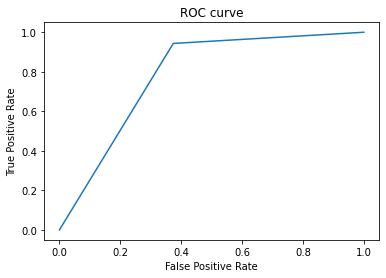

AUC value is 0.7846107885997721 


In [98]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, threshold= roc_curve(y_pred,y_test)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
print("AUC value is {} ".format(auc(fpr, tpr)))

# Actual Vs Predicted:

In [99]:
original=np.array(y_test)
predicted=np.array(xgb.predict(x_test))
compare=pd.DataFrame({'Actual':original,'Predicted':predicted},index=range(len(original)))
compare

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
49155,0,0
49156,1,1
49157,1,1
49158,1,1


## Saving The Model:

In [100]:
import joblib
joblib.dump(xgb,'Micro_Credit_project_Model')

['Micro_Credit_project_Model']